In [1]:
from TCN_BIRTH import endtoend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#TIME SERIES BIRTH RATES
ts = pd.read_csv('live_birth.csv', thousands=",", header='infer', skiprows=10, skipfooter=16,engine='python').T
ts.iloc[0][0] = "Total Live-Births"
ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.index.names = ['quarter']
ts.reset_index(level=0, inplace=True)
ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')
ts['time'] = pd.PeriodIndex(ts['quarter'], freq='Q').to_timestamp()

def quarterify(rawdf):    
    rawdf = rawdf.rename(columns=rawdf.iloc[0]).drop(rawdf.index[0])
    rawdf = rawdf[::-1]
    rawdf.reset_index(level=0, inplace=True)
    rawdf = rawdf.rename(columns={'index': 'quarter'})
    rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')
    return rawdf
def birthmergify(quarteredf, birthdf):
    mergedf =pd.merge(birthdf, quarteredf, on='quarter', how='inner')
    mergedf = mergedf.dropna().reset_index(drop=True) # row
    #raw_gdp = raw_gdp.dropna(axis=1, how='any') # column
    mergedf = mergedf[::-1].reset_index(drop = True)
    mergedf = mergedf.drop(columns=mergedf.columns[(mergedf == 'na').any()])
    return mergedf

def select_feature(raw_df, length):
    target = list(raw_df)[1]
    cols = list(raw_df)[9:length] ## 9 length of birth order factors
    timelist = list(raw_df['time'])
    print('Training set shape:{}'.format(raw_df.shape))
    print('Length of Time Series: {}'.format(len(timelist)))
    print('Feature targetted: {}'.format(target))
    print('Featured selected: {}'.format(cols))
    return target, cols
ts

/tmp/ipykernel_22599/1199900175.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


quarter Total Live-Births   1st Live-Birth   2nd Live-Birth  \
0    2021-Q3           10097.0           4666.0           3673.0   
1    2021-Q2            9411.0           4298.0           3459.0   
2    2021-Q1            8894.0           4097.0           3220.0   
3    2020-Q4            9808.0           4722.0           3451.0   
4    2020-Q3            9836.0           4762.0           3330.0   
..       ...               ...              ...              ...   
138  1987-Q1            8834.0           4007.0           3053.0   
139  1986-Q4           10239.0           4782.0           3423.0   
140  1986-Q3            9854.0           4398.0           3475.0   
141  1986-Q2            9353.0           4186.0           3367.0   
142  1986-Q1            9954.0           4414.0           3553.0   

      3rd Live-Birth   4th Live-Birth   5th Live-Birth  \
0             1210.0            361.0             98.0   
1             1140.0            339.0            112.0   
2             1093.0            326.0             98.0   
3             1133.0            323.0            117.0   
4             1174.0            381.0            116.0   
..               ...              ...              ...   
138           1234.0            320.0             81.0   
139           1454.0            351.0             98.0   
140           1395.0            359.0             98.0   
141           1271.0            332.0             87.0   
142           1433.0            316.0            103.0   

      6th Live-Birth & Over       time  
0                      89.0 2021-07-01  
1                      63.0 2021-04-01  
2                      60.0 2021-01-01  
3                      62.0 2020-10-01  
4                      73.0 2020-07-01  
..                      ...        ...  
138                    56.0 1987-01-01  
139                    51.0 1986-10-01  
140                    44.0 1986-07-01  
141                    50.0 1986-04-01  
142                    61.0 1986-01-01  

[143 rows x 9 columns]

In [2]:
## LABOUR COST ACROSS INDUSTRIES ( FACTOR PAYMENTS)
ulc = pd.read_csv("unit_labour_cost_index.csv", header='infer', skiprows=10, skipfooter=18,engine='python').T
quartered_lc = quarterify(ulc)
emp_comp = pd.read_csv("employee_compen_industry.csv", header='infer', skiprows=10, thousands=",", skipfooter=18,engine='python').T
raw_lc = birthmergify(quartered_lc, quarterify(emp_comp))
raw_income = birthmergify(raw_lc,ts)
raw_income

/tmp/ipykernel_22599/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


quarter Total Live-Births   1st Live-Birth   2nd Live-Birth  \
0    1986-Q1            9954.0           4414.0           3553.0   
1    1986-Q2            9353.0           4186.0           3367.0   
2    1986-Q3            9854.0           4398.0           3475.0   
3    1986-Q4           10239.0           4782.0           3423.0   
4    1987-Q1            8834.0           4007.0           3053.0   
..       ...               ...              ...              ...   
138  2020-Q3            9836.0           4762.0           3330.0   
139  2020-Q4            9808.0           4722.0           3451.0   
140  2021-Q1            8894.0           4097.0           3220.0   
141  2021-Q2            9411.0           4298.0           3459.0   
142  2021-Q3           10097.0           4666.0           3673.0   

      3rd Live-Birth   4th Live-Birth   5th Live-Birth  \
0             1433.0            316.0            103.0   
1             1271.0            332.0             87.0   
2             1395.0            359.0             98.0   
3             1454.0            351.0             98.0   
4             1234.0            320.0             81.0   
..               ...              ...              ...   
138           1174.0            381.0            116.0   
139           1133.0            323.0            117.0   
140           1093.0            326.0             98.0   
141           1140.0            339.0            112.0   
142           1210.0            361.0             98.0   

      6th Live-Birth & Over       time    Total  ...  \
0                      61.0 1986-01-01   4547.5  ...   
1                      50.0 1986-04-01   4246.5  ...   
2                      44.0 1986-07-01   4269.9  ...   
3                      51.0 1986-10-01   4337.1  ...   
4                      56.0 1987-01-01   4398.5  ...   
..                      ...        ...      ...  ...   
138                    73.0 2020-07-01  50950.5  ...   
139                    62.0 2020-10-01  51210.8  ...   
140                    60.0 2021-01-01  51755.9  ...   
141                    63.0 2021-04-01  53055.0  ...   
142                    89.0 2021-07-01  53627.5  ...   

        Unit Labour Cost Of Utilities  \
0                                88.6   
1                                74.7   
2                                72.8   
3                                94.1   
4                                73.0   
..                                ...   
138                             102.2   
139                             104.6   
140                             130.9   
141                             102.2   
142                             107.5   

        Unit Labour Cost Of Other Goods Industries  \
0                                             61.2   
1                                             50.4   
2                                             47.9   
3                                             51.5   
4                                             54.4   
..                                             ...   
138                                           92.1   
139                                           91.5   
140                                           99.3   
141                                           90.6   
142                                           94.5   

      Unit Labour Cost Of Services Producing Industries  \
0                                                 70.3    
1                                                 61.7    
2                                                 61.2    
3                                                 68.4    
4                                                 62.7    
..                                                 ...    
138                                               98.6    
139                                              101.2    
140                                              114.6    
141                                              104.1    
142                        

In [3]:
target = list(raw_income)[1]
cols = list(raw_income)[21:35]
timelist = list(raw_income['time'])
print('Training set shape:{}'.format(raw_income.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))

Training set shape:(143, 35)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['Unit Labour Cost Of Overall Economy', '  Unit Labour Cost Of Goods Producing Industries', '    Unit Labour Cost Of Manufacturing', '    Unit Labour Cost Of Construction', '    Unit Labour Cost Of Utilities', '    Unit Labour Cost Of Other Goods Industries', '  Unit Labour Cost Of Services Producing Industries', '    Unit Labour Cost Of Wholesale & Retail Trade', '    Unit Labour Cost Of Transportation & Storage', '    Unit Labour Cost Of Accommodation & Food Services', '    Unit Labour Cost Of Information & Communications', '    Unit Labour Cost Of Finance & Insurance', '    Unit Labour Cost Of Real Estate, Professional Services And Administrative & Support Services', '    Unit Labour Cost Of Other Services Industries']


mse:  5565032.0 mae:  1859.6565


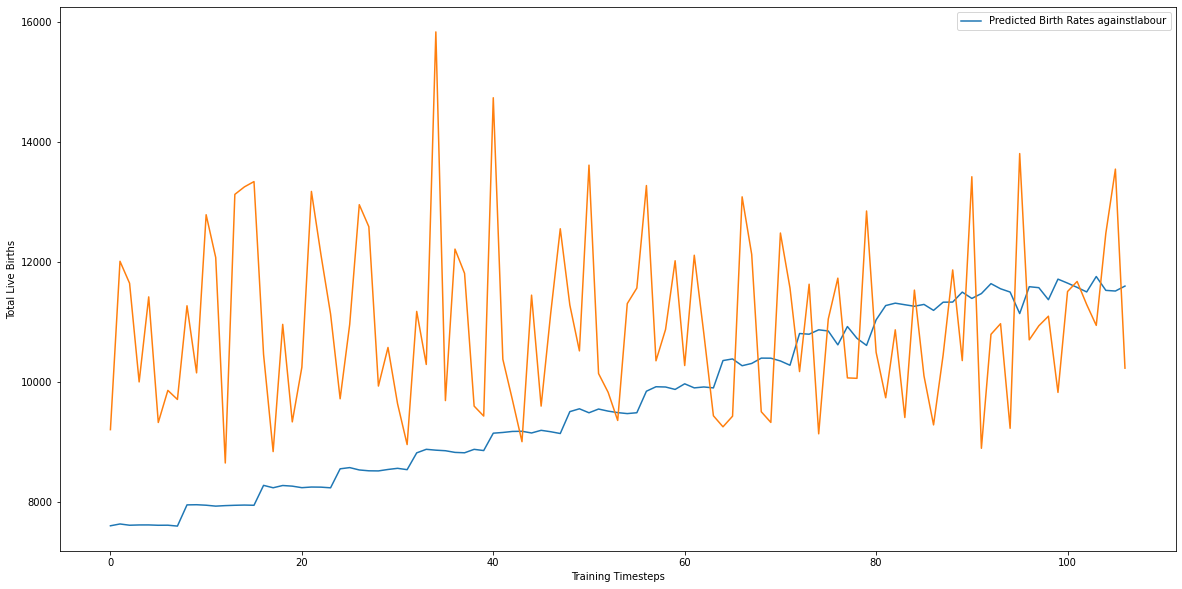

Iter:  0 train_loss:  1.470482156611979 val_loss:  0.2714631576091051
Iter:  1 train_loss:  0.5985145531594753 val_loss:  0.4660590626299381
Iter:  2 train_loss:  0.530653481837362 val_loss:  0.31703145802021027
Iter:  3 train_loss:  0.4239116651006043 val_loss:  0.3240607939660549
Iter:  4 train_loss:  0.2741994969546795 val_loss:  0.6718615591526031
Iter:  5 train_loss:  0.23764158110134304 val_loss:  0.6328099481761456
Iter:  6 train_loss:  0.21932804072275758 val_loss:  0.5035465396940708
Iter:  7 train_loss:  0.1600244448054582 val_loss:  0.6628371849656105
Iter:  8 train_loss:  0.14509434113278985 val_loss:  0.7294112592935562
Iter:  9 train_loss:  0.14587814500555396 val_loss:  0.7080252021551132
Iter:  10 train_loss:  0.16047852579504251 val_loss:  0.6466820798814297
Iter:  11 train_loss:  0.13888684241101146 val_loss:  0.7185439541935921
Iter:  12 train_loss:  0.09928415610920638 val_loss:  0.6771251522004604
Iter:  13 train_loss:  0.08899858104996383 val_loss:  0.704739116132

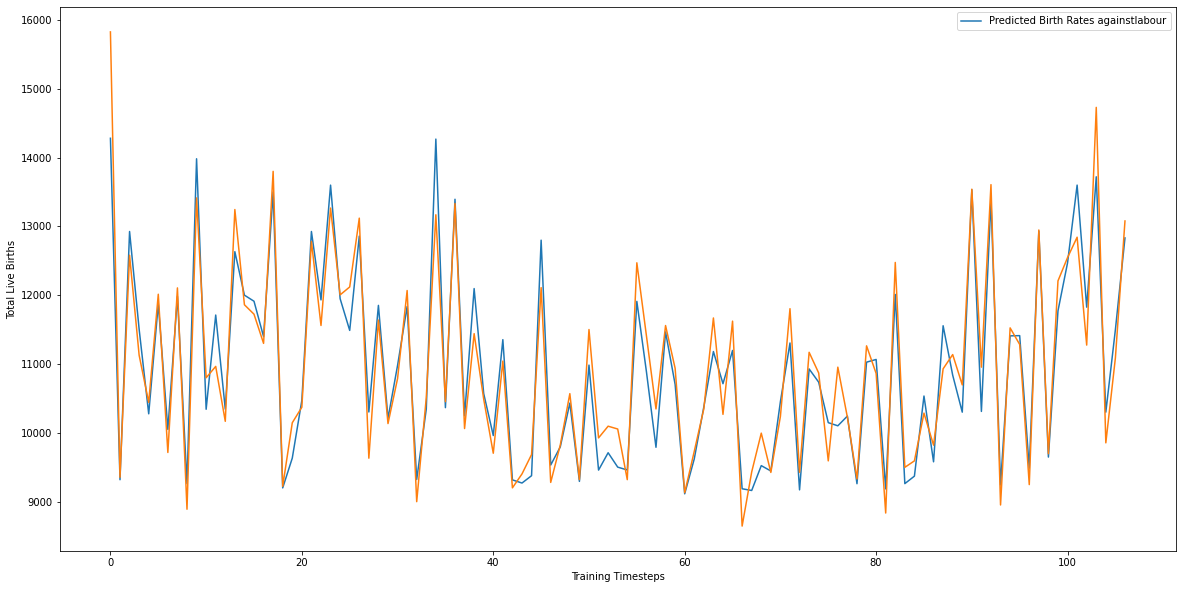

Iter:  20 train_loss:  0.045286479871720076 val_loss:  0.7390746101737022
Iter:  21 train_loss:  0.049732155923265964 val_loss:  0.9395535886287689
Iter:  22 train_loss:  0.05571187601890415 val_loss:  0.9024584367871284
Iter:  23 train_loss:  0.04795260401442647 val_loss:  0.831667747348547
Iter:  24 train_loss:  0.05053147510625422 val_loss:  0.9565681666135788
Iter:  25 train_loss:  0.04381689801812172 val_loss:  0.8224975578486919
Iter:  26 train_loss:  0.038644446118269116 val_loss:  0.9258091300725937
Iter:  27 train_loss:  0.051350285415537655 val_loss:  0.9759665131568909
Iter:  28 train_loss:  0.046771207998972386 val_loss:  0.9085125476121902
Iter:  29 train_loss:  0.03996306558838114 val_loss:  0.871539868414402
Iter:  30 train_loss:  0.03316567535512149 val_loss:  0.9340832233428955
Iter:  31 train_loss:  0.03175793561240425 val_loss:  0.9278817474842072
Iter:  32 train_loss:  0.030368415522389114 val_loss:  0.8226650804281235
Iter:  33 train_loss:  0.03979241516208276 val_

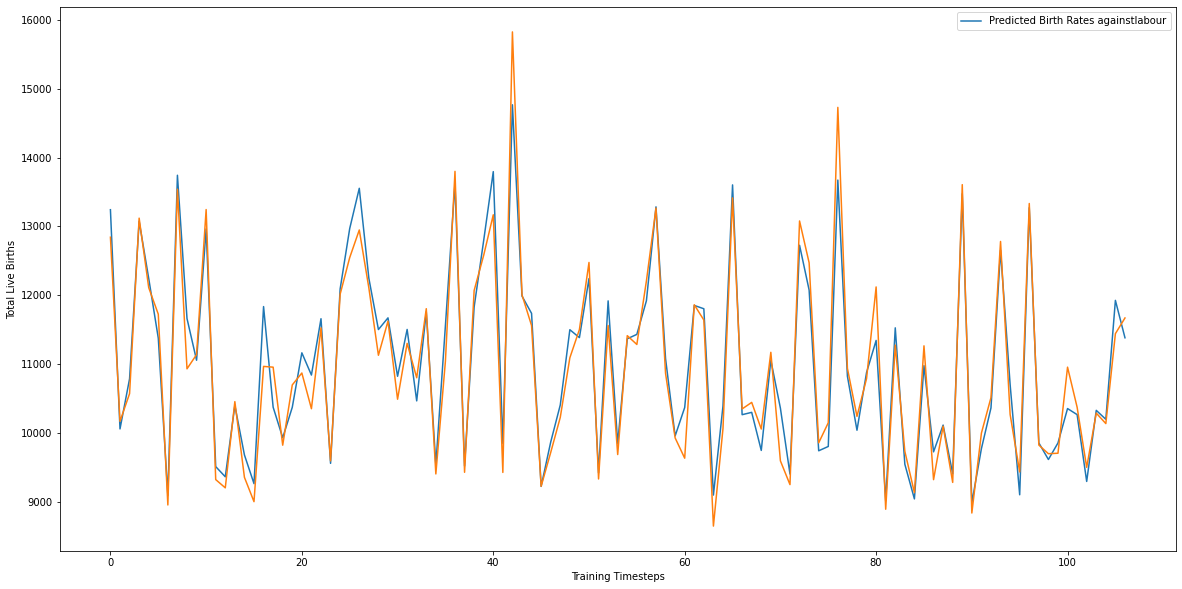

Iter:  40 train_loss:  0.03041446686256677 val_loss:  0.9001953229308128
Iter:  41 train_loss:  0.02706851839320734 val_loss:  0.8530716523528099
Iter:  42 train_loss:  0.03149100620066747 val_loss:  0.8940743282437325
Iter:  43 train_loss:  0.04066041123587638 val_loss:  0.7984640970826149
Iter:  44 train_loss:  0.032212428050115705 val_loss:  0.9211707264184952
Iter:  45 train_loss:  0.026509639603318647 val_loss:  0.8414333984255791
Iter:  46 train_loss:  0.030912195798009634 val_loss:  0.8218624219298363
Iter:  47 train_loss:  0.030586160748498514 val_loss:  0.8477623164653778
Iter:  48 train_loss:  0.025964376516640186 val_loss:  0.9336939379572868
Iter:  49 train_loss:  0.025969553156755865 val_loss:  0.8709359765052795
Iter:  50 train_loss:  0.02627458202186972 val_loss:  0.942623645067215
Iter:  51 train_loss:  0.02251919492846355 val_loss:  0.8211897872388363
Iter:  52 train_loss:  0.01943402420147322 val_loss:  0.9157332926988602
Iter:  53 train_loss:  0.018682014080695808 va

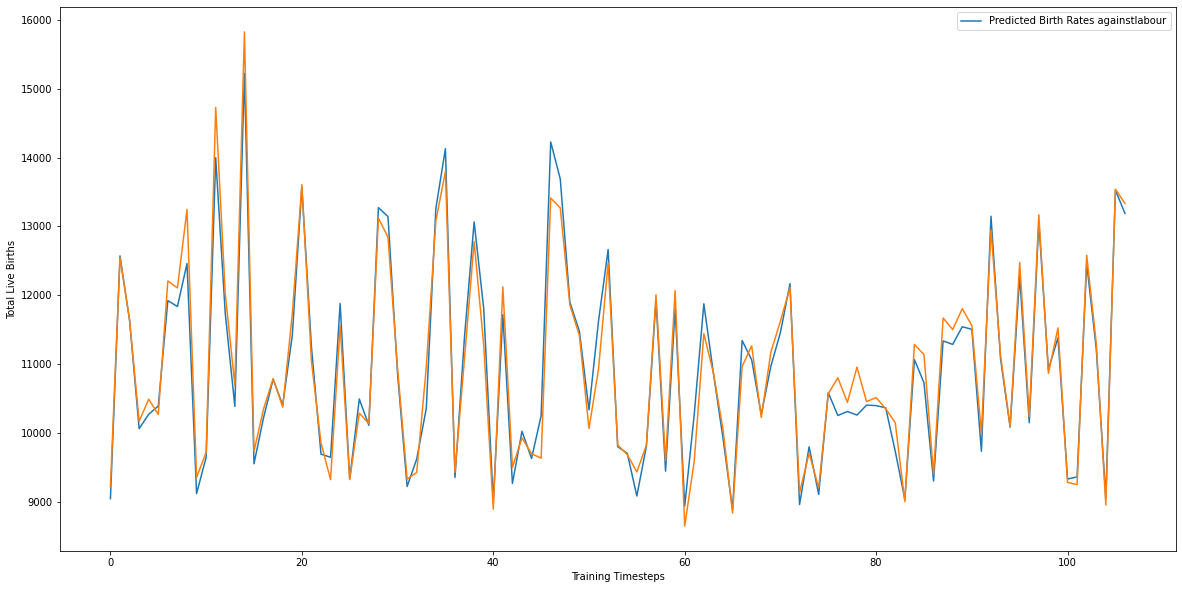

Iter:  60 train_loss:  0.021163781493669376 val_loss:  0.8608708679676056
Iter:  61 train_loss:  0.017773703846614808 val_loss:  0.9498416855931282
Iter:  62 train_loss:  0.016259820549748838 val_loss:  0.9037663638591766
Iter:  63 train_loss:  0.019816336105577648 val_loss:  0.9344025254249573
Iter:  64 train_loss:  0.02325051190564409 val_loss:  0.9387325718998909
Iter:  65 train_loss:  0.021923813968896866 val_loss:  0.9054688438773155
Iter:  66 train_loss:  0.02263833388860803 val_loss:  0.9795072823762894
Iter:  67 train_loss:  0.01967410129145719 val_loss:  0.9202994927763939
Iter:  68 train_loss:  0.014848319144221023 val_loss:  1.0231423527002335
Iter:  69 train_loss:  0.0172817746642977 val_loss:  0.9144976288080215
Iter:  70 train_loss:  0.013289785056258552 val_loss:  0.9400886371731758
Iter:  71 train_loss:  0.01629354726173915 val_loss:  0.9311994165182114
Iter:  72 train_loss:  0.01333351967332419 val_loss:  0.9968700408935547
Iter:  73 train_loss:  0.012849521968746558 v

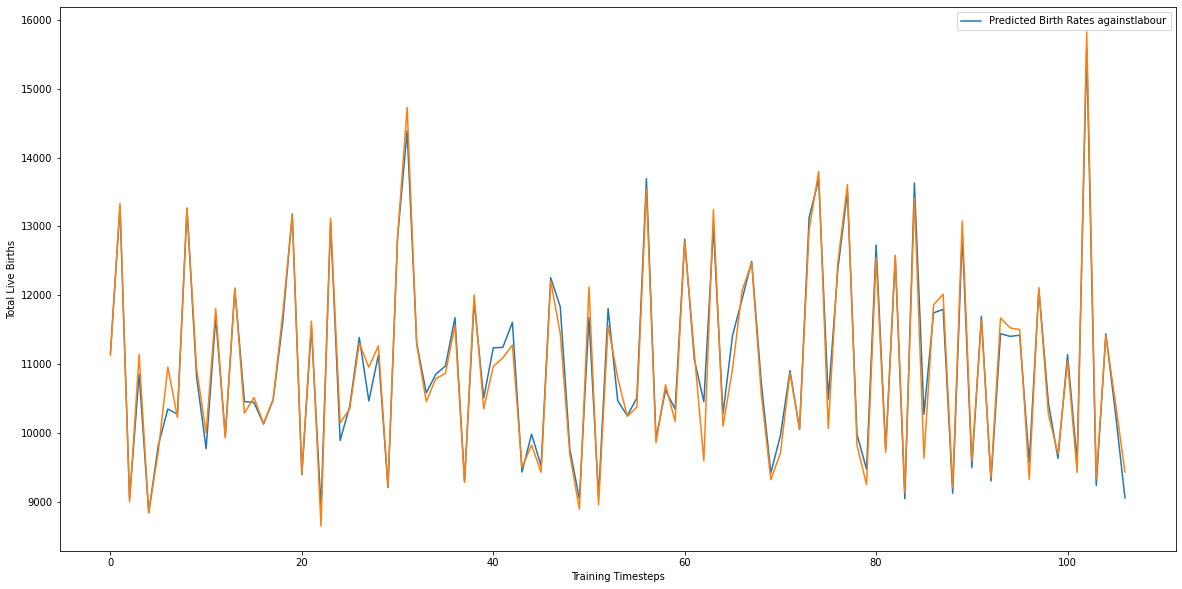

Iter:  80 train_loss:  0.011993335094302893 val_loss:  0.98239466547966
Iter:  81 train_loss:  0.011256313562626019 val_loss:  0.8937525600194931
Iter:  82 train_loss:  0.01408237760188058 val_loss:  0.9861840307712555
Iter:  83 train_loss:  0.013546998445235658 val_loss:  0.9075804874300957
Iter:  84 train_loss:  0.012130918476032093 val_loss:  0.9521878883242607
Iter:  85 train_loss:  0.01456897653406486 val_loss:  0.9615786224603653
Iter:  86 train_loss:  0.010826536679815035 val_loss:  0.9182142019271851
Iter:  87 train_loss:  0.012525957754405681 val_loss:  0.9866368025541306
Iter:  88 train_loss:  0.013301926548592746 val_loss:  0.8695358261466026
Iter:  89 train_loss:  0.014849117083940655 val_loss:  0.946391336619854
Iter:  90 train_loss:  0.018038887734292075 val_loss:  0.8779675364494324
Iter:  91 train_loss:  0.012715933320578188 val_loss:  0.9109078794717789
Iter:  92 train_loss:  0.01225350660388358 val_loss:  0.9536663517355919
Iter:  93 train_loss:  0.012620513618458062 

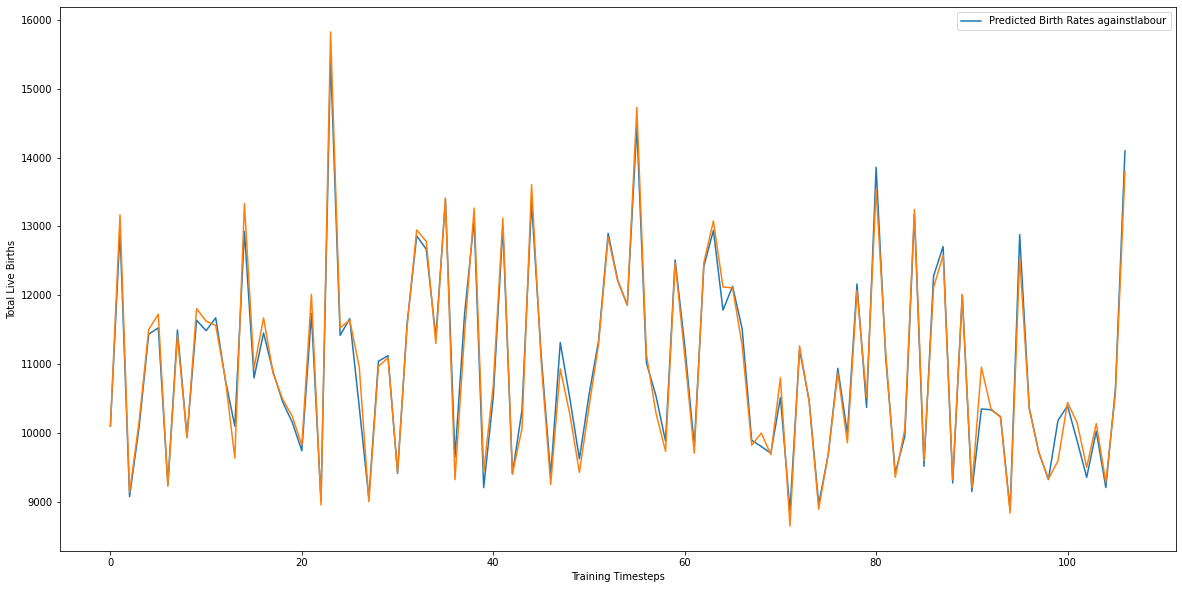

Iter:  100 train_loss:  0.009739393688505515 val_loss:  0.9540124386548996
Iter:  101 train_loss:  0.008885813222150318 val_loss:  0.9473181143403053
Iter:  102 train_loss:  0.010606216608721297 val_loss:  0.9780415594577789
Iter:  103 train_loss:  0.009055104397702962 val_loss:  0.9524918422102928
Iter:  104 train_loss:  0.008656553727632854 val_loss:  0.9118982180953026
Iter:  105 train_loss:  0.008190991095034406 val_loss:  0.9012211188673973
Iter:  106 train_loss:  0.00933400457870448 val_loss:  0.9540223404765129
Iter:  107 train_loss:  0.008067503451457014 val_loss:  0.9009868204593658
Iter:  108 train_loss:  0.009390495833940804 val_loss:  0.9610140025615692
Iter:  109 train_loss:  0.010944276524242014 val_loss:  0.927477665245533
Iter:  110 train_loss:  0.009743835442350246 val_loss:  0.8861115053296089
Iter:  111 train_loss:  0.010123478758032434 val_loss:  1.0167913436889648
Iter:  112 train_loss:  0.01136362217948772 val_loss:  0.9162050783634186
Iter:  113 train_loss:  0.00

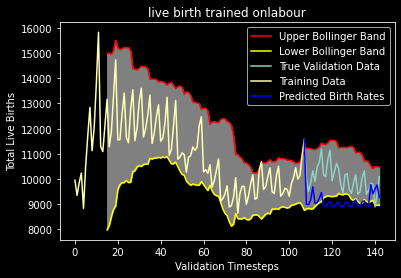

<Figure size 12000x12000 with 0 Axes>

In [4]:
endtoend(target, cols, raw_income, "labour")

In [5]:
gdp = pd.read_csv("./gdp.csv", header='infer', skiprows=10, skipfooter=18,engine='python', thousands=",").T
gdp = quarterify(gdp)
raw_gdp = birthmergify(gdp,ts)

/tmp/ipykernel_22599/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


In [6]:
## feature selection
target = list(raw_gdp)[1]
cols = list(raw_gdp)[9:26]
timelist = list(raw_gdp['time'])
print('Training set shape:{}'.format(raw_gdp.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))
raw_gdp

Training set shape:(143, 26)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['GDP In Chained (2015) Dollars', '  Goods Producing Industries', '    Manufacturing', '    Construction', '    Utilities', '    Other Goods Industries', '  Services Producing Industries', '    Wholesale & Retail Trade', '    Transportation & Storage', '    Accommodation & Food Services', '    Information & Communications', '    Finance & Insurance', '    Real Estate, Professional Services And Administrative & Support Services', '    Other Services Industries', '  Ownership Of Dwellings', '  Gross Value Added At Basic Prices', '  Add: Taxes On Products']


quarter Total Live-Births   1st Live-Birth   2nd Live-Birth  \
0    1986-Q1            9954.0           4414.0           3553.0   
1    1986-Q2            9353.0           4186.0           3367.0   
2    1986-Q3            9854.0           4398.0           3475.0   
3    1986-Q4           10239.0           4782.0           3423.0   
4    1987-Q1            8834.0           4007.0           3053.0   
..       ...               ...              ...              ...   
138  2020-Q3            9836.0           4762.0           3330.0   
139  2020-Q4            9808.0           4722.0           3451.0   
140  2021-Q1            8894.0           4097.0           3220.0   
141  2021-Q2            9411.0           4298.0           3459.0   
142  2021-Q3           10097.0           4666.0           3673.0   

      3rd Live-Birth   4th Live-Birth   5th Live-Birth  \
0             1433.0            316.0            103.0   
1             1271.0            332.0             87.0   
2             1395.0            359.0             98.0   
3             1454.0            351.0             98.0   
4             1234.0            320.0             81.0   
..               ...              ...              ...   
138           1174.0            381.0            116.0   
139           1133.0            323.0            117.0   
140           1093.0            326.0             98.0   
141           1140.0            339.0            112.0   
142           1210.0            361.0             98.0   

      6th Live-Birth & Over       time GDP In Chained (2015) Dollars  ...  \
0                      61.0 1986-01-01                       15622.5  ...   
1                      50.0 1986-04-01                       16075.7  ...   
2                      44.0 1986-07-01                       16555.6  ...   
3                      51.0 1986-10-01                       17070.8  ...   
4                      56.0 1987-01-01                       16881.1  ...   
..                      ...        ...                           ...  ...   
138                    73.0 2020-07-01                      113497.3  ...   
139                    62.0 2020-10-01                      118906.7  ...   
140                    60.0 2021-01-01                      119367.5  ...   
141                    63.0 2021-04-01                      119660.0  ...   
142                    89.0 2021-07-01                      121514.4  ...   

        Wholesale & Retail Trade     Transportation & Storage  \
0                         1509.7                       1619.4   
1                         1621.5                       1674.2   
2                         1666.5                       1730.8   
3                         1785.4                       1730.9   
4                         1542.1                       1712.7   
..                           ...                          ...   
138                      15948.1                       5735.1   
139                      17732.3                       5917.4   
140                      16514.9                       6110.6   
141                      16782.6                       6099.3   
142                      16816.6                       6203.3   

        Accommodation & Food Services     Information & Communications  \
0                               587.2                            197.6   
1                               577.6                            202.7   
2                               612.0                            207.2   
3                               639.8                            215.8   
4                               615.0                            220.5   
..                                ...                              ...   
138                            1892.1                           5530.1   
139                            1937.7                           5744.4   
140                            1844.1                           5591.5   
141                            1728.8        

mse:  3594484.2 mae:  1532.1614


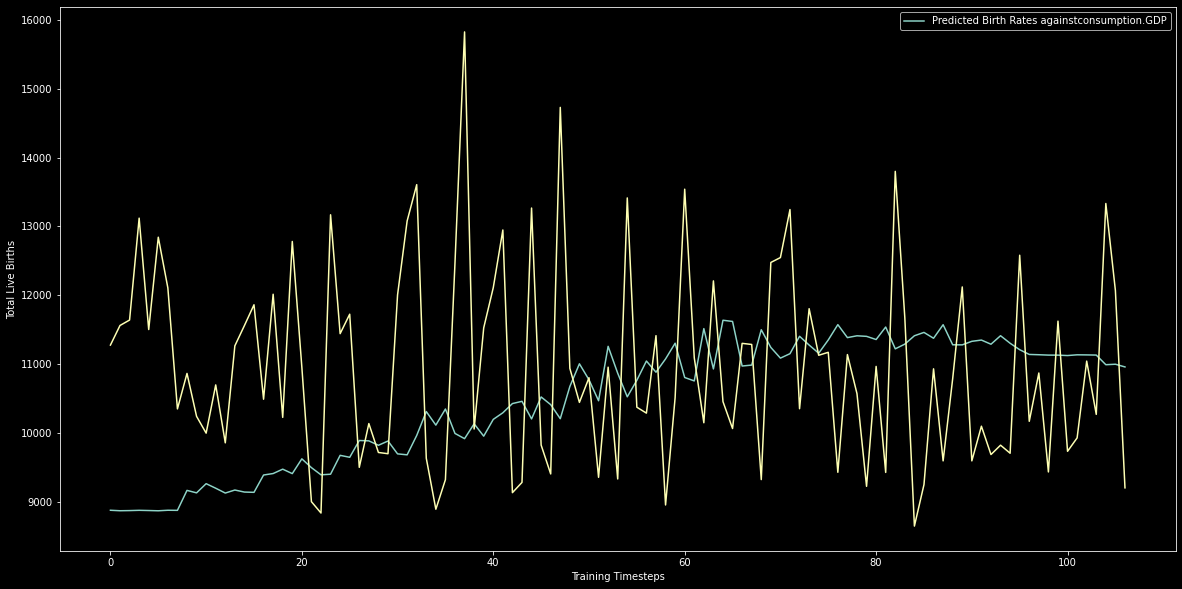

Iter:  0 train_loss:  0.9710672441869974 val_loss:  0.37396314181387424
Iter:  1 train_loss:  0.4927907222881913 val_loss:  0.38814500719308853
Iter:  2 train_loss:  0.3656847357051447 val_loss:  0.3768969923257828
Iter:  3 train_loss:  0.3075072565115988 val_loss:  0.38409120589494705
Iter:  4 train_loss:  0.26619764789938927 val_loss:  0.5107436403632164
Iter:  5 train_loss:  0.2689103833399713 val_loss:  0.3243028596043587
Iter:  6 train_loss:  0.2440837905742228 val_loss:  0.5944049805402756
Iter:  7 train_loss:  0.29157527117058635 val_loss:  0.4347609020769596
Iter:  8 train_loss:  0.2492992663756013 val_loss:  0.3716016113758087
Iter:  9 train_loss:  0.20034786383621395 val_loss:  0.5032698661088943
Iter:  10 train_loss:  0.21817796118557453 val_loss:  0.2929122932255268
Iter:  11 train_loss:  0.23659714357927442 val_loss:  0.4286855570971966
Iter:  12 train_loss:  0.18576939473859966 val_loss:  0.43330201134085655
Iter:  13 train_loss:  0.19109618244692683 val_loss:  0.40039212

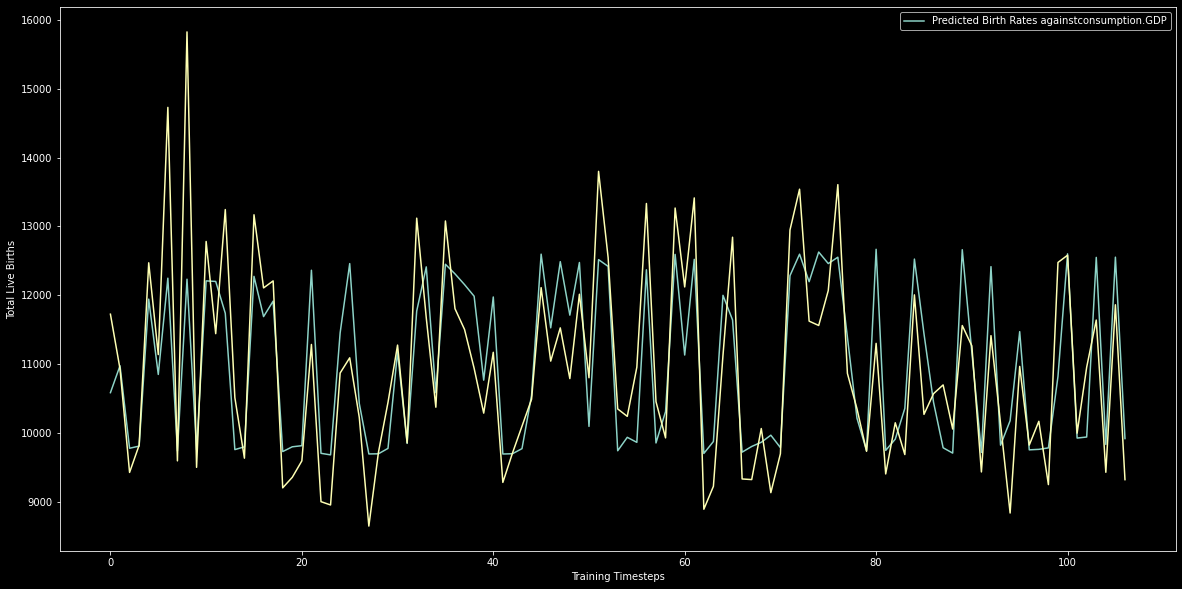

Iter:  20 train_loss:  0.1795427156612277 val_loss:  0.4912053793668747
Iter:  21 train_loss:  0.176453557331115 val_loss:  0.4467431679368019
Iter:  22 train_loss:  0.16880281758494675 val_loss:  0.541442759335041
Iter:  23 train_loss:  0.18685546424239874 val_loss:  0.44023390859365463
Iter:  24 train_loss:  0.17413122300058603 val_loss:  0.4668056070804596
Iter:  25 train_loss:  0.19083273550495505 val_loss:  0.5642065182328224
Iter:  26 train_loss:  0.16717012785375118 val_loss:  0.4879722595214844
Iter:  27 train_loss:  0.17105533415451646 val_loss:  0.488067664206028
Iter:  28 train_loss:  0.17396225780248642 val_loss:  0.4711211770772934
Iter:  29 train_loss:  0.1655468661338091 val_loss:  0.47675128281116486
Iter:  30 train_loss:  0.1571265608072281 val_loss:  0.5469792187213898
Iter:  31 train_loss:  0.17057580454275012 val_loss:  0.5447517782449722
Iter:  32 train_loss:  0.1535365276504308 val_loss:  0.45314889401197433
Iter:  33 train_loss:  0.14663360500708222 val_loss:  0.

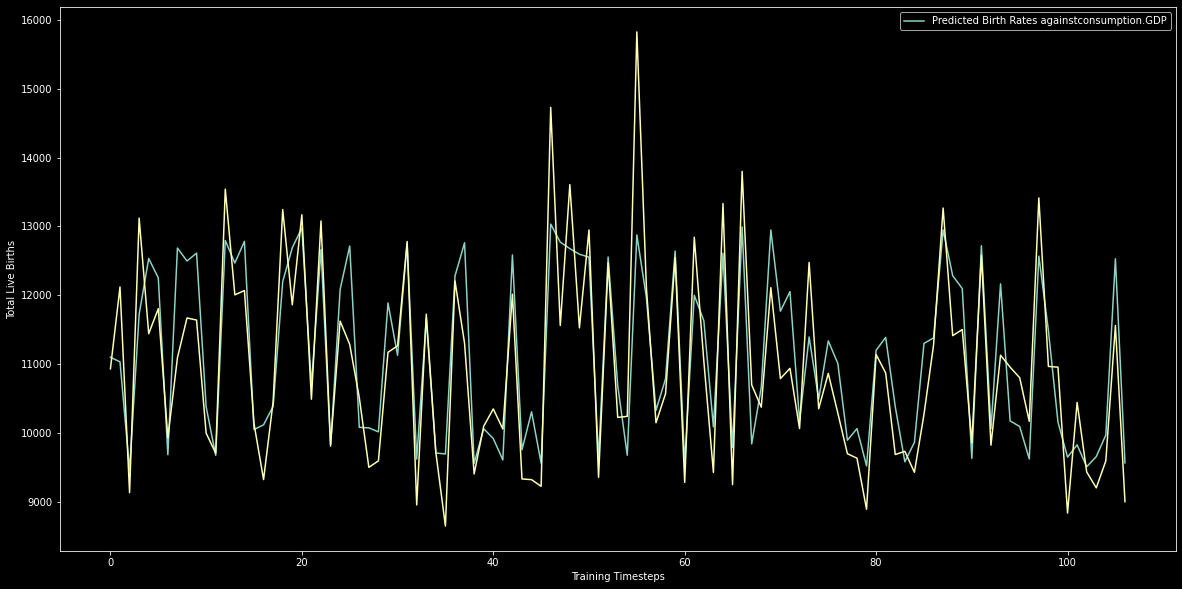

Iter:  40 train_loss:  0.14524911902844906 val_loss:  0.5661918148398399
Iter:  41 train_loss:  0.1557401865720749 val_loss:  0.42267395555973053
Iter:  42 train_loss:  0.16301602008752525 val_loss:  0.5048396289348602
Iter:  43 train_loss:  0.13841523230075836 val_loss:  0.5470968410372734
Iter:  44 train_loss:  0.13169057248160243 val_loss:  0.5624376460909843
Iter:  45 train_loss:  0.13331526541151106 val_loss:  0.5468806996941566
Iter:  46 train_loss:  0.12425237847492099 val_loss:  0.4661019966006279
Iter:  47 train_loss:  0.12176309572532773 val_loss:  0.48560860753059387
Iter:  48 train_loss:  0.11837873794138432 val_loss:  0.5758940204977989
Iter:  49 train_loss:  0.13027443597093225 val_loss:  0.4835306257009506
Iter:  50 train_loss:  0.12647838483098894 val_loss:  0.44001806899905205
Iter:  51 train_loss:  0.10706763841153588 val_loss:  0.5083808079361916
Iter:  52 train_loss:  0.11404311540536582 val_loss:  0.5579588711261749
Iter:  53 train_loss:  0.09800276905298233 val_lo

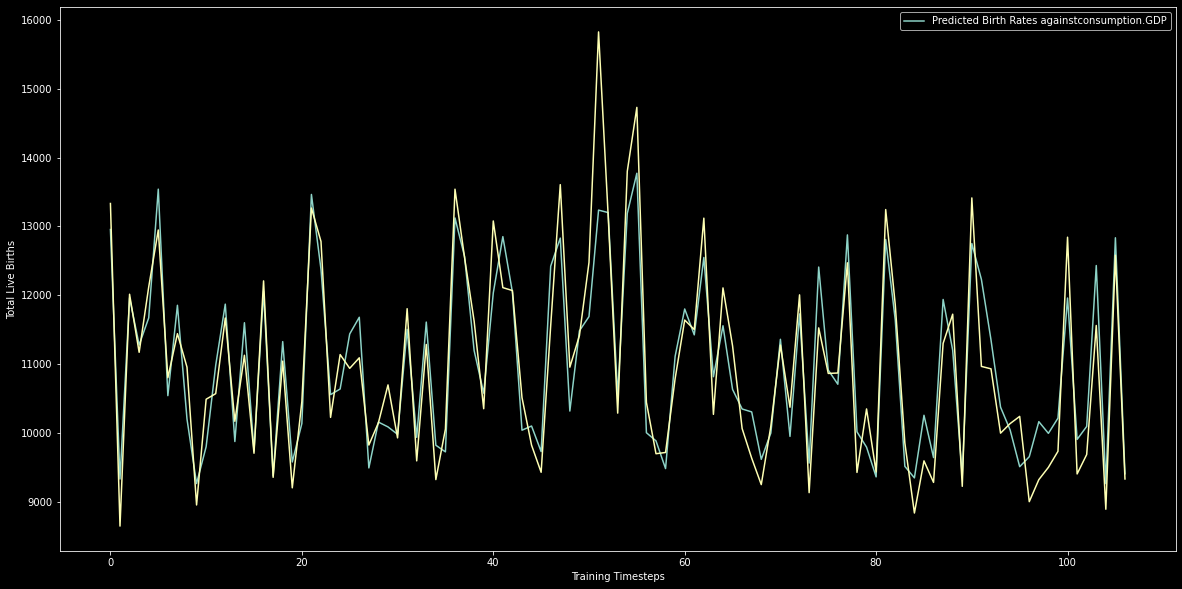

Iter:  60 train_loss:  0.07770145661197603 val_loss:  0.4358109012246132
Iter:  61 train_loss:  0.09650635020807385 val_loss:  0.4303067550063133
Iter:  62 train_loss:  0.07689013541676104 val_loss:  0.48982415348291397
Iter:  63 train_loss:  0.07334745523985475 val_loss:  0.5191269963979721
Iter:  64 train_loss:  0.08038199925795197 val_loss:  0.4877180866897106
Iter:  65 train_loss:  0.07835640583653003 val_loss:  0.3876489847898483
Iter:  66 train_loss:  0.07425515062641352 val_loss:  0.4340941123664379
Iter:  67 train_loss:  0.0661774753825739 val_loss:  0.37540608644485474
Iter:  68 train_loss:  0.06664095656014979 val_loss:  0.37283166497945786
Iter:  69 train_loss:  0.05704971752129495 val_loss:  0.44030606001615524
Iter:  70 train_loss:  0.05798255593981594 val_loss:  0.4982340708374977
Iter:  71 train_loss:  0.07385682384483516 val_loss:  0.3887200355529785
Iter:  72 train_loss:  0.08090715459547937 val_loss:  0.3796510137617588
Iter:  73 train_loss:  0.08522389060817659 val_l

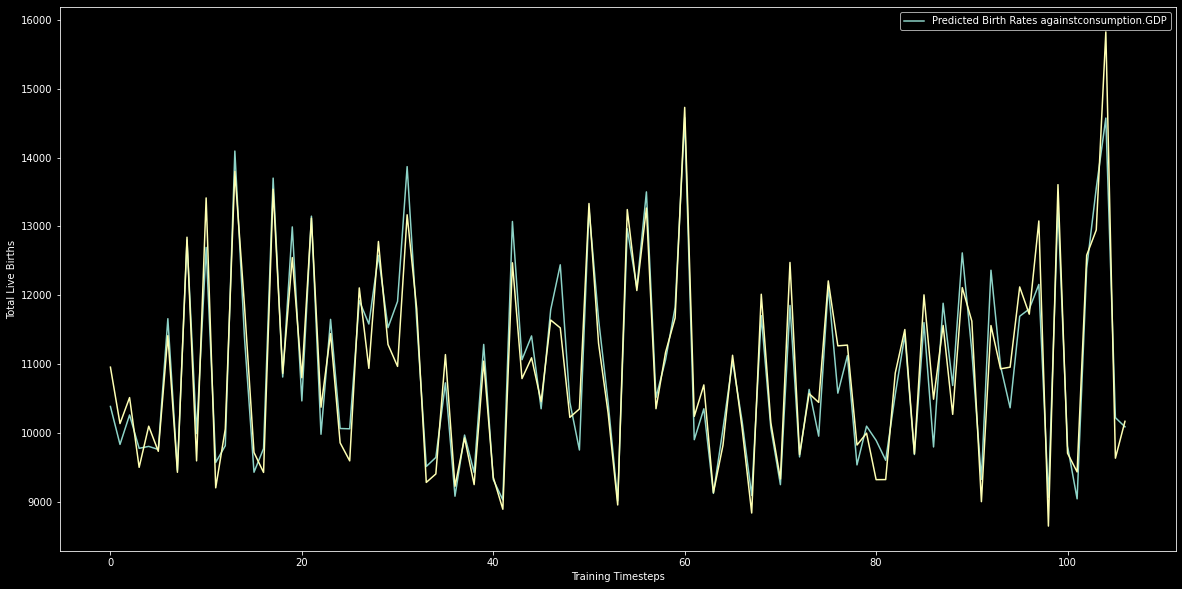

Iter:  80 train_loss:  0.0464083738042973 val_loss:  0.4352070279419422
Iter:  81 train_loss:  0.04691172461025417 val_loss:  0.4597245343029499
Iter:  82 train_loss:  0.04062187852105126 val_loss:  0.4281059764325619
Iter:  83 train_loss:  0.04157868213951588 val_loss:  0.4377925843000412
Iter:  84 train_loss:  0.045148637727834284 val_loss:  0.4249321036040783
Iter:  85 train_loss:  0.050431480165570974 val_loss:  0.4528111517429352
Iter:  86 train_loss:  0.039899810566566885 val_loss:  0.5443708077073097
Iter:  87 train_loss:  0.043594700226094574 val_loss:  0.4582271911203861
Iter:  88 train_loss:  0.03592829924309626 val_loss:  0.40846772491931915
Iter:  89 train_loss:  0.03219365456607193 val_loss:  0.4821551665663719
Iter:  90 train_loss:  0.04016797011718154 val_loss:  0.45413941890001297
Iter:  91 train_loss:  0.0298654378275387 val_loss:  0.41360777616500854
Iter:  92 train_loss:  0.03102333622518927 val_loss:  0.40544193238019943
Iter:  93 train_loss:  0.03296950820367783 va

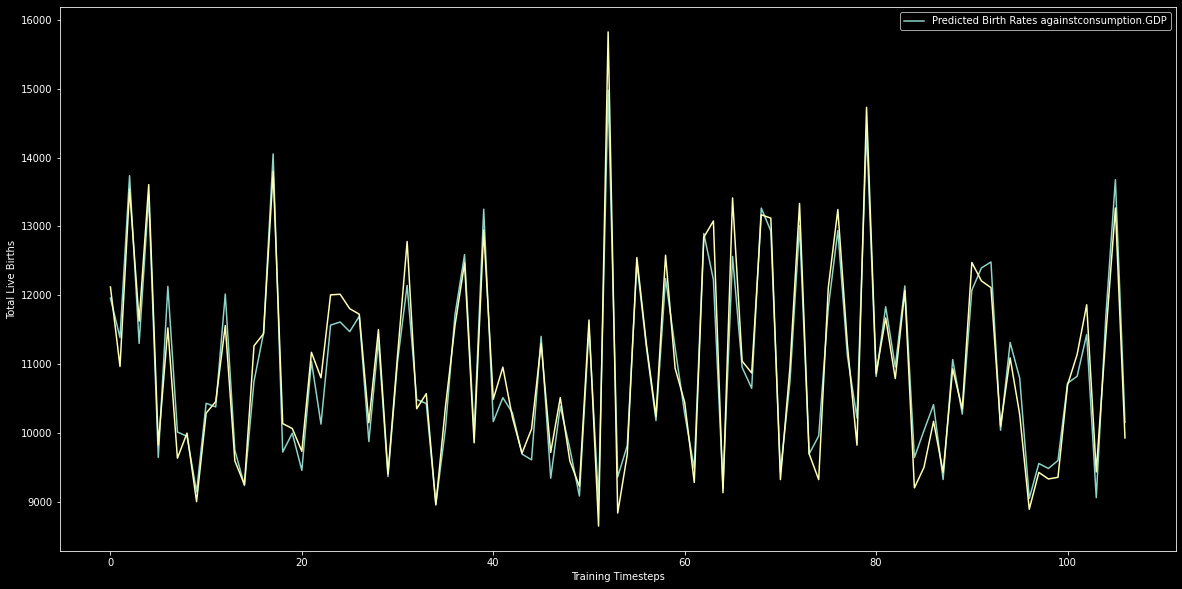

Iter:  100 train_loss:  0.02643633319530636 val_loss:  0.38779579661786556
Iter:  101 train_loss:  0.029951174394227564 val_loss:  0.385973185300827
Iter:  102 train_loss:  0.02860993891954422 val_loss:  0.3816375155001879
Iter:  103 train_loss:  0.02272612866363488 val_loss:  0.41563455387949944
Iter:  104 train_loss:  0.02400742983445525 val_loss:  0.38975735008716583
Iter:  105 train_loss:  0.023438747506588697 val_loss:  0.4269363768398762
Iter:  106 train_loss:  0.023446161299943924 val_loss:  0.4603314697742462
Iter:  107 train_loss:  0.02499393979087472 val_loss:  0.40452736616134644
Iter:  108 train_loss:  0.020528680935967714 val_loss:  0.43662573397159576
Iter:  109 train_loss:  0.018887606071075425 val_loss:  0.4322809912264347
Iter:  110 train_loss:  0.02092904772143811 val_loss:  0.4144754931330681
Iter:  111 train_loss:  0.020817905431613326 val_loss:  0.40213805064558983
Iter:  112 train_loss:  0.02078787103528157 val_loss:  0.42849526181817055
Iter:  113 train_loss:  0.

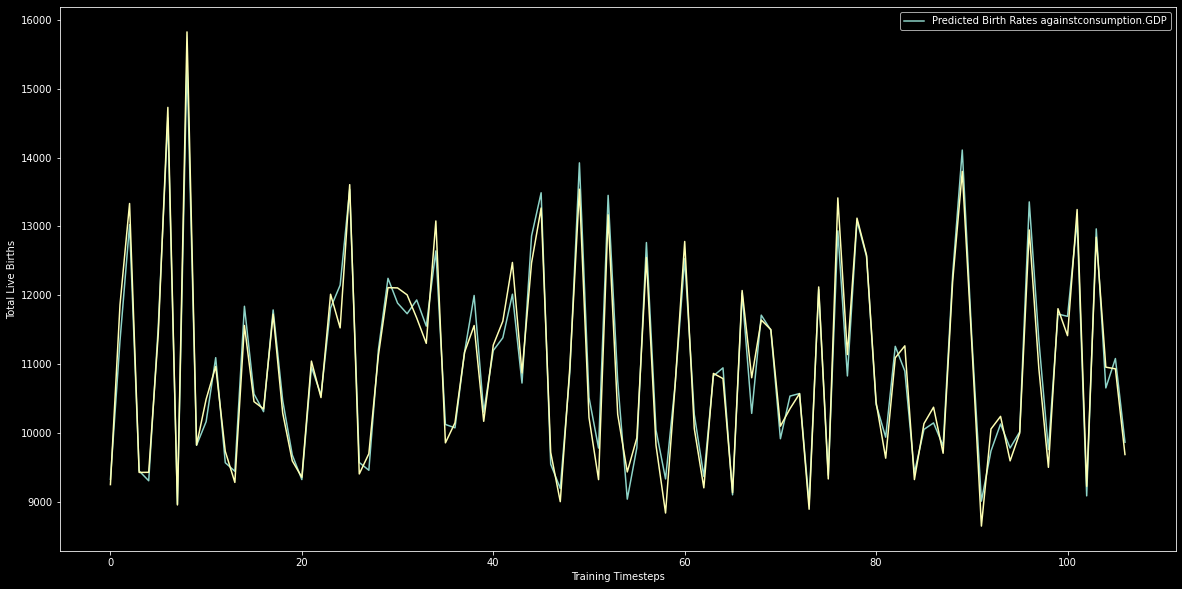

Iter:  120 train_loss:  0.01583416531502735 val_loss:  0.43307147175073624
Iter:  121 train_loss:  0.016069764649728313 val_loss:  0.4415989816188812
Iter:  122 train_loss:  0.020775302225956693 val_loss:  0.40895604714751244
Iter:  123 train_loss:  0.019068867957685143 val_loss:  0.39673306606709957
Iter:  124 train_loss:  0.019091343812760897 val_loss:  0.4319838024675846
Iter:  125 train_loss:  0.019169175036950037 val_loss:  0.42859381809830666
Iter:  126 train_loss:  0.02172570614493452 val_loss:  0.4468131698668003
Iter:  127 train_loss:  0.021545006369706243 val_loss:  0.44575096294283867
Iter:  128 train_loss:  0.014747623121365905 val_loss:  0.4370618090033531
Iter:  129 train_loss:  0.015487857745029032 val_loss:  0.44439829140901566
Mean Square Error: 0.08987829 | Mean Absolute Error: 0.25901136


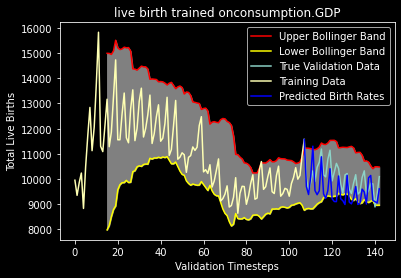

<Figure size 12000x12000 with 0 Axes>

In [7]:
endtoend(target, cols, raw_gdp, "consumption.GDP")

In [8]:
investment = pd.read_csv("./investment.csv", header='infer', skiprows=10, skipfooter=16,engine='python', thousands=",").T
raw_investment = birthmergify(quarterify(investment),ts)
## feature selection
def select_feature(raw_df, length):
    target = list(raw_df)[1]
    cols = list(raw_df)[9:length]
    timelist = list(raw_df['time'])
    print('Training set shape:{}'.format(raw_df.shape))
    print('Length of Time Series: {}'.format(len(timelist)))
    print('Feature targetted: {}'.format(target))
    print('Featured selected: {}'.format(cols))
    return target, cols

target, cols = select_feature(raw_investment,33)
raw_investment

Training set shape:(143, 33)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['Gross Fixed Capital Formation', '  Construction & Works', '    Residential Buildings', '    Non-Residential Buildings', '    Other Construction & Works', '  Transport Equipment', '  Machinery & Equipment', '  Intellectual Property Products', 'Gross Fixed Capital Formation (Public Sector)', '  Construction & Works (Public Sector)', '    Residential Buildings (Public Sector)', '    Non-Residential Buildings (Public Sector)', '    Other Construction & Works (Public Sector)', '  Transport Equipment (Public Sector)', '  Machinery & Equipment (Public Sector)', '  Intellectual Property Products (Public Sector)', 'Gross Fixed Capital Formation (Private Sector) ', '  Construction & Works (Private Sector)', '    Residential Buildings (Private Sector) ', '    Non-Residential Buildings (Private Sector)', '    Other Construction & Works (Private Sector)', '  Transport Equipment (Private

/tmp/ipykernel_22599/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


quarter Total Live-Births   1st Live-Birth   2nd Live-Birth  \
0    1986-Q1            9954.0           4414.0           3553.0   
1    1986-Q2            9353.0           4186.0           3367.0   
2    1986-Q3            9854.0           4398.0           3475.0   
3    1986-Q4           10239.0           4782.0           3423.0   
4    1987-Q1            8834.0           4007.0           3053.0   
..       ...               ...              ...              ...   
138  2020-Q3            9836.0           4762.0           3330.0   
139  2020-Q4            9808.0           4722.0           3451.0   
140  2021-Q1            8894.0           4097.0           3220.0   
141  2021-Q2            9411.0           4298.0           3459.0   
142  2021-Q3           10097.0           4666.0           3673.0   

      3rd Live-Birth   4th Live-Birth   5th Live-Birth  \
0             1433.0            316.0            103.0   
1             1271.0            332.0             87.0   
2             1395.0            359.0             98.0   
3             1454.0            351.0             98.0   
4             1234.0            320.0             81.0   
..               ...              ...              ...   
138           1174.0            381.0            116.0   
139           1133.0            323.0            117.0   
140           1093.0            326.0             98.0   
141           1140.0            339.0            112.0   
142           1210.0            361.0             98.0   

      6th Live-Birth & Over       time Gross Fixed Capital Formation  ...  \
0                      61.0 1986-01-01                        4834.1  ...   
1                      50.0 1986-04-01                        4257.2  ...   
2                      44.0 1986-07-01                        4808.7  ...   
3                      51.0 1986-10-01                        4507.3  ...   
4                      56.0 1987-01-01                        4579.8  ...   
..                      ...        ...                           ...  ...   
138                    73.0 2020-07-01                       22669.8  ...   
139                    62.0 2020-10-01                       28491.6  ...   
140                    60.0 2021-01-01                       27657.9  ...   
141                    63.0 2021-04-01                       28474.4  ...   
142                    89.0 2021-07-01                       28421.9  ...   

      Machinery & Equipment (Public Sector)  \
0                                     122.9   
1                                     117.7   
2                                     112.5   
3                                     120.5   
4                                     129.9   
..                                      ...   
138                                   245.1   
139                                   258.8   
140                                   626.7   
141                                   408.2   
142                                   276.6   

      Intellectual Property Products (Public Sector)  \
0                                               39.9   
1                                               36.7   
2                                               37.5   
3                                               42.1   
4                                               45.5   
..                                               ...   
138                                            559.8   
139                                            552.0   
140                                            542.5   
141                                            564.3   
142                                            576.0   

    Gross Fixed Capital Formation (Private Sector)   \
0                                            3050.7   
1                                            2297.7   
2                                            2824.6   
3                                            2500.8   
4                                            2696.7  

mse:  2757954.8 mae:  1276.7527


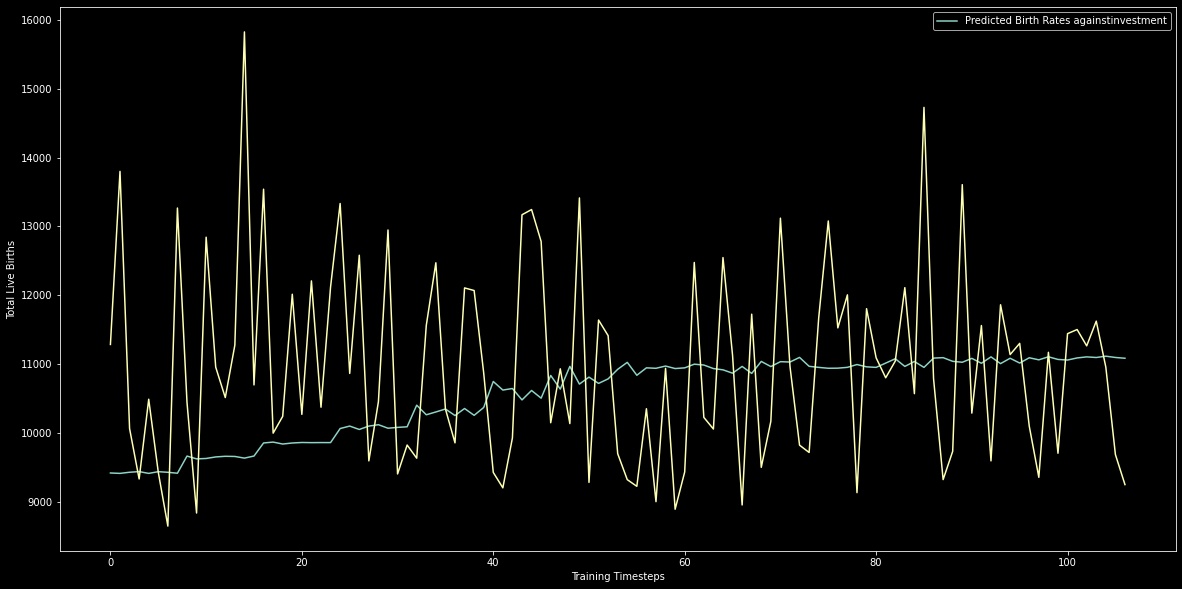

Iter:  0 train_loss:  0.7367016924545169 val_loss:  0.3442127536982298
Iter:  1 train_loss:  0.5339785758405924 val_loss:  0.45950257033109665
Iter:  2 train_loss:  0.39773455914109945 val_loss:  0.5504367165267467
Iter:  3 train_loss:  0.3267173452768475 val_loss:  0.3782733455300331
Iter:  4 train_loss:  0.32284198328852654 val_loss:  0.2989707812666893
Iter:  5 train_loss:  0.3302261270582676 val_loss:  0.6079339720308781
Iter:  6 train_loss:  0.28953546192497015 val_loss:  0.46645044162869453
Iter:  7 train_loss:  0.2730378210544586 val_loss:  0.3752797357738018
Iter:  8 train_loss:  0.2762136706151068 val_loss:  0.5727386176586151
Iter:  9 train_loss:  0.30301266349852085 val_loss:  0.3477184474468231
Iter:  10 train_loss:  0.23333881003782153 val_loss:  0.4367802143096924
Iter:  11 train_loss:  0.2051718740258366 val_loss:  0.45908262953162193
Iter:  12 train_loss:  0.2196400985121727 val_loss:  0.46312931552529335
Iter:  13 train_loss:  0.20382147748023272 val_loss:  0.316144842

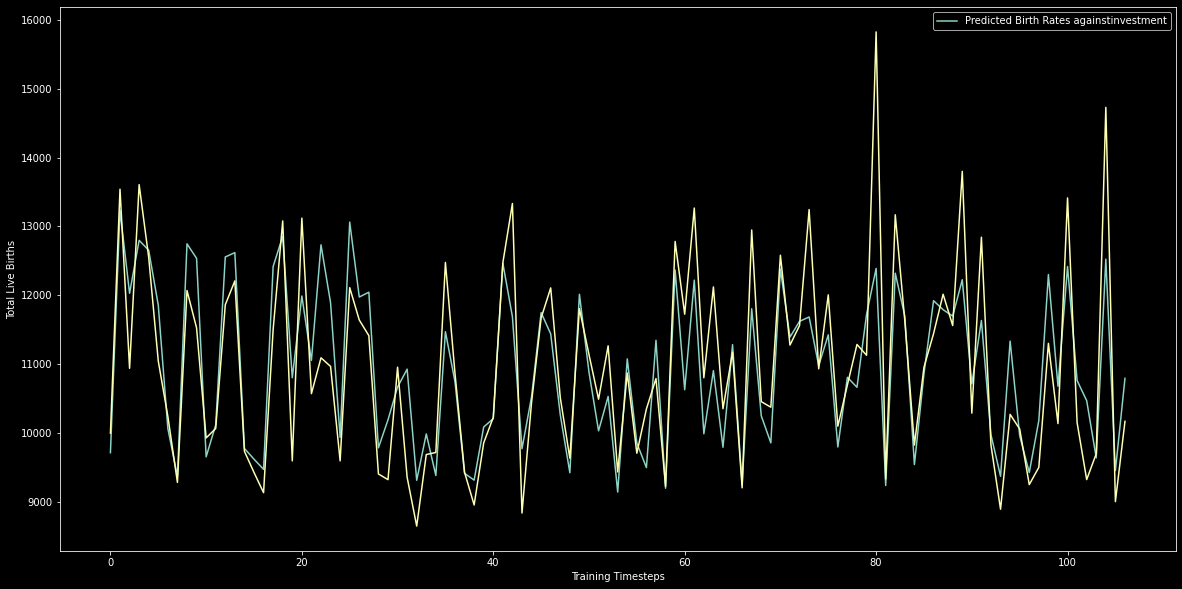

Iter:  20 train_loss:  0.17763111786916852 val_loss:  0.34015399403870106
Iter:  21 train_loss:  0.12870976916747168 val_loss:  0.37517841532826424
Iter:  22 train_loss:  0.12791608963743784 val_loss:  0.440007284283638
Iter:  23 train_loss:  0.12756779184564948 val_loss:  0.35792736150324345
Iter:  24 train_loss:  0.11723338672891259 val_loss:  0.3976822756230831
Iter:  25 train_loss:  0.11698791943490505 val_loss:  0.3887799456715584
Iter:  26 train_loss:  0.11519782047253102 val_loss:  0.40841663628816605
Iter:  27 train_loss:  0.10898242087569088 val_loss:  0.4777897521853447
Iter:  28 train_loss:  0.09458105312660336 val_loss:  0.516188234090805
Iter:  29 train_loss:  0.10010786051861942 val_loss:  0.4359848126769066
Iter:  30 train_loss:  0.07260033150669187 val_loss:  0.4775063656270504
Iter:  31 train_loss:  0.07554248636006378 val_loss:  0.4795045107603073
Iter:  32 train_loss:  0.0679335119202733 val_loss:  0.5550186261534691
Iter:  33 train_loss:  0.0793329068692401 val_loss

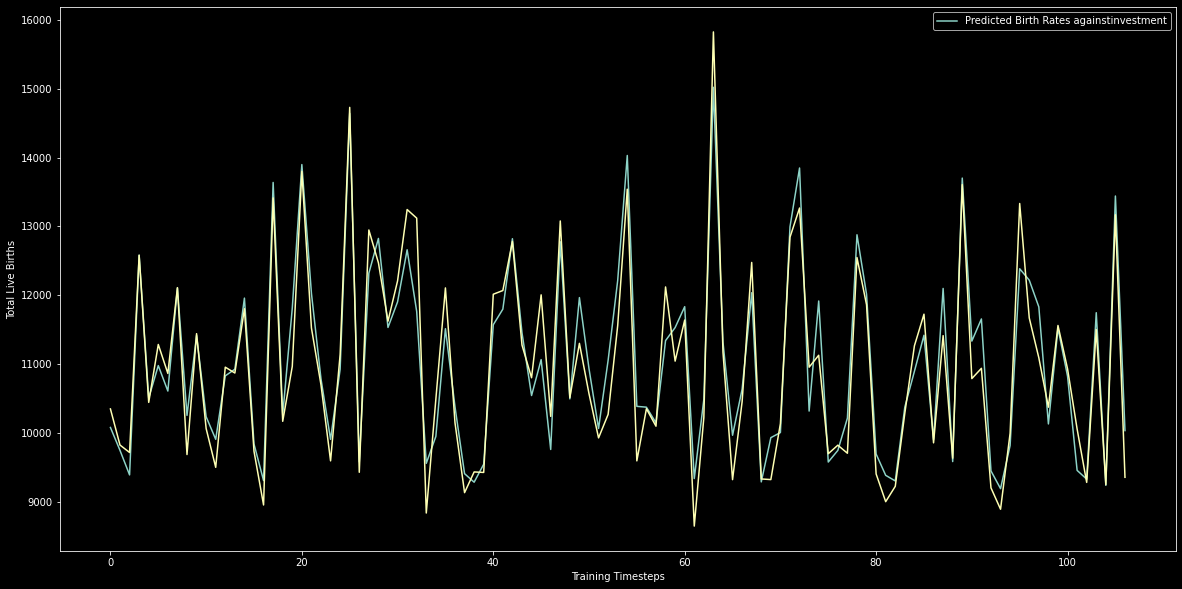

Iter:  40 train_loss:  0.05104367469903082 val_loss:  0.6008150316774845
Iter:  41 train_loss:  0.047620918456232175 val_loss:  0.5287655331194401
Iter:  42 train_loss:  0.045176989457104355 val_loss:  0.5620816349983215
Iter:  43 train_loss:  0.04807429248467088 val_loss:  0.5969654619693756
Iter:  44 train_loss:  0.049567782087251544 val_loss:  0.5921102538704872
Iter:  45 train_loss:  0.051205095602199435 val_loss:  0.5260908119380474
Iter:  46 train_loss:  0.048029498546384275 val_loss:  0.5730267465114594
Iter:  47 train_loss:  0.04378874829853885 val_loss:  0.5808748751878738
Iter:  48 train_loss:  0.040730151580646634 val_loss:  0.6180592477321625
Iter:  49 train_loss:  0.03403569891816005 val_loss:  0.6005323603749275
Iter:  50 train_loss:  0.03372085583396256 val_loss:  0.6057921573519707
Iter:  51 train_loss:  0.0347616383805871 val_loss:  0.6607353612780571
Iter:  52 train_loss:  0.031926373194437474 val_loss:  0.6250647455453873
Iter:  53 train_loss:  0.029401626146864146 v

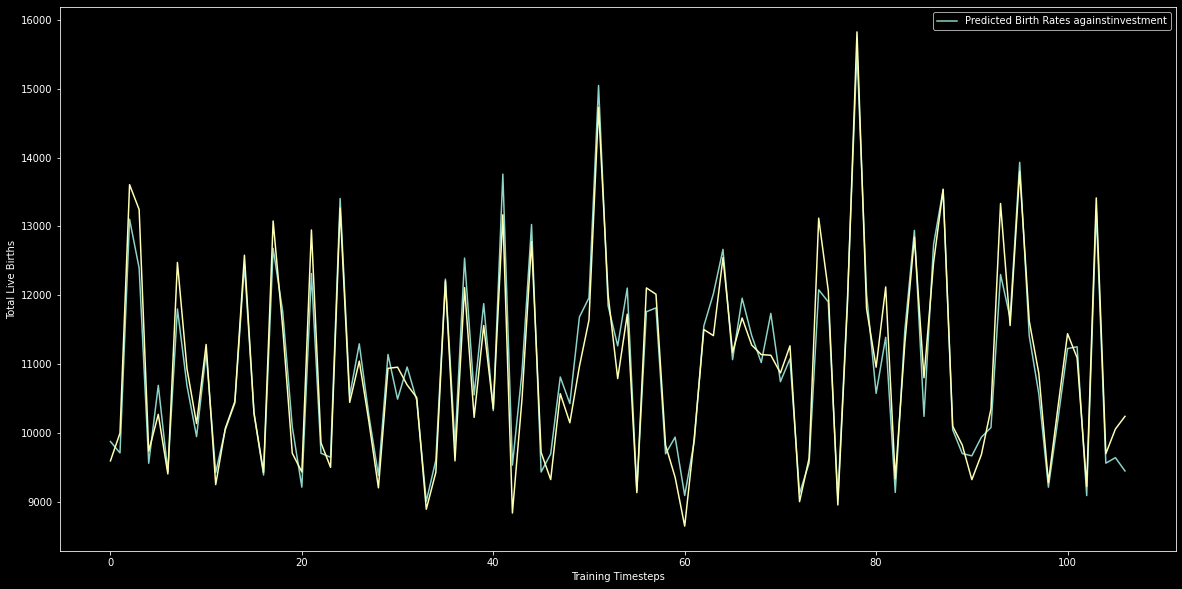

Iter:  60 train_loss:  0.03443182003684342 val_loss:  0.6541363447904587
Iter:  61 train_loss:  0.03323611314408481 val_loss:  0.671537421643734
Iter:  62 train_loss:  0.02883119398029521 val_loss:  0.632297970354557
Iter:  63 train_loss:  0.024593843205366284 val_loss:  0.626675795763731
Iter:  64 train_loss:  0.02101148379733786 val_loss:  0.6723600216209888
Iter:  65 train_loss:  0.022217057179659605 val_loss:  0.6538093648850918
Iter:  66 train_loss:  0.019295685167890042 val_loss:  0.6736453473567963
Iter:  67 train_loss:  0.022703608905430883 val_loss:  0.6782947331666946
Iter:  68 train_loss:  0.023875907354522496 val_loss:  0.6932121403515339
Iter:  69 train_loss:  0.022380821203114465 val_loss:  0.6702798530459404
Iter:  70 train_loss:  0.017295527446549386 val_loss:  0.681757565587759
Iter:  71 train_loss:  0.01724297896726057 val_loss:  0.6747151203453541
Iter:  72 train_loss:  0.015729023260064423 val_loss:  0.6729706823825836
Iter:  73 train_loss:  0.01622727996436879 val_

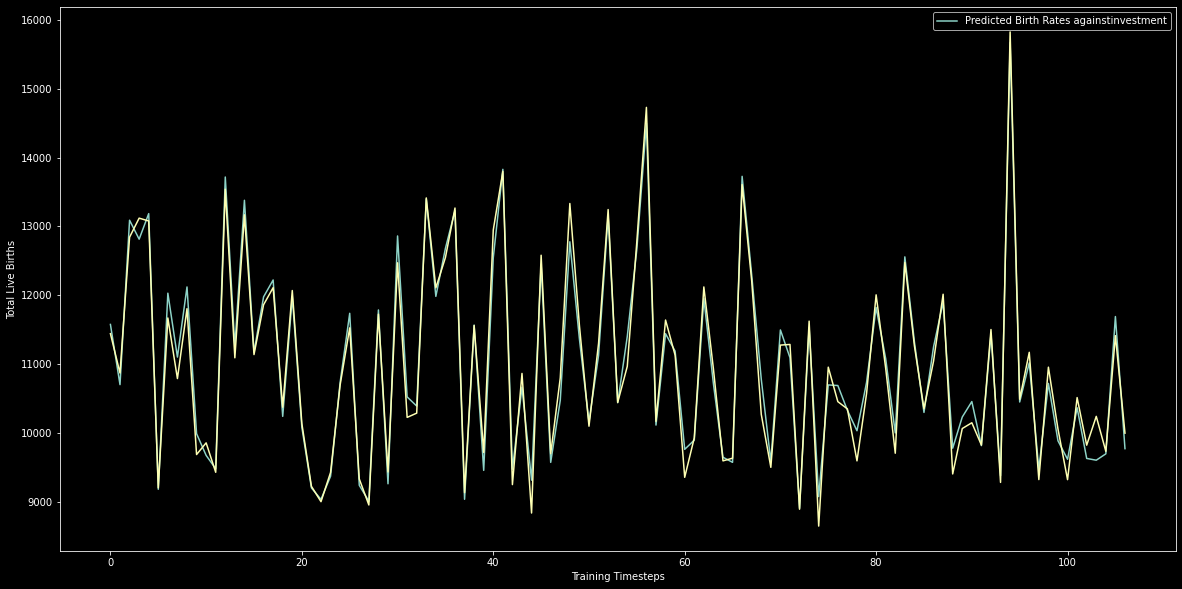

Iter:  80 train_loss:  0.01282366065424867 val_loss:  0.6985758766531944
Iter:  81 train_loss:  0.011055133887566626 val_loss:  0.6944407895207405
Iter:  82 train_loss:  0.012117809994379058 val_loss:  0.6867830716073513
Iter:  83 train_loss:  0.01308567811793182 val_loss:  0.6728750020265579
Iter:  84 train_loss:  0.011647133564110845 val_loss:  0.6896815076470375
Iter:  85 train_loss:  0.009792422642931342 val_loss:  0.6675545200705528
Iter:  86 train_loss:  0.013828278024448082 val_loss:  0.6901166513562202
Iter:  87 train_loss:  0.011526275804499164 val_loss:  0.7007033452391624
Iter:  88 train_loss:  0.011576255463296548 val_loss:  0.7098730504512787
Iter:  89 train_loss:  0.013203351729316637 val_loss:  0.7196274250745773
Iter:  90 train_loss:  0.008741653473407496 val_loss:  0.703991424292326
Iter:  91 train_loss:  0.009254841570509598 val_loss:  0.6837823465466499
Iter:  92 train_loss:  0.009130020800512284 val_loss:  0.6982761956751347
Iter:  93 train_loss:  0.0099440386984497

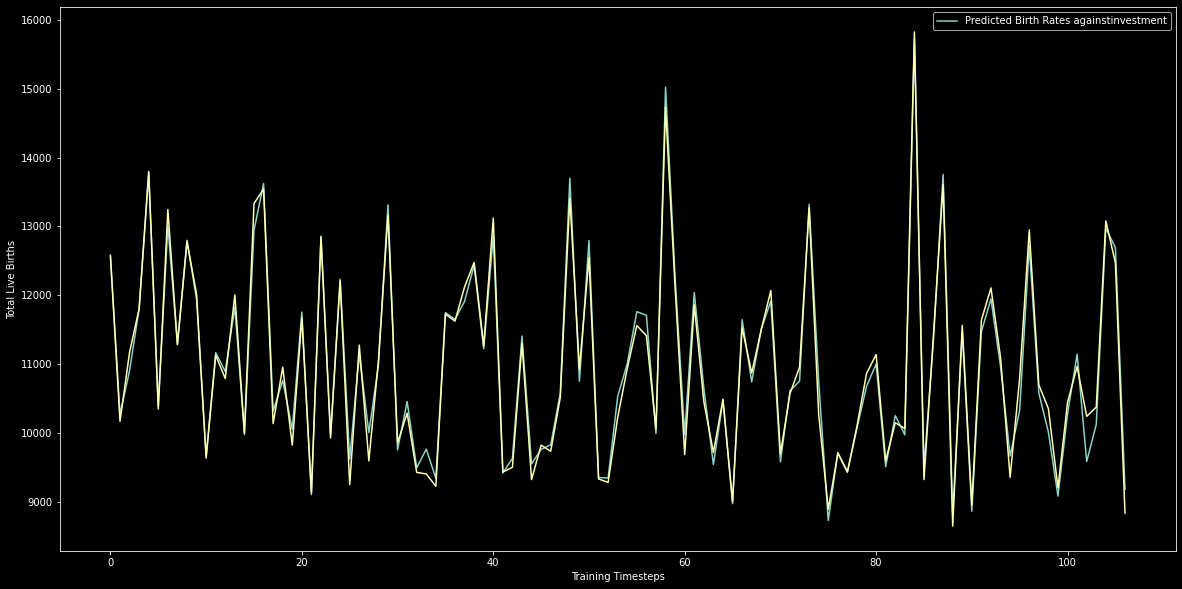

Iter:  100 train_loss:  0.00994259696744848 val_loss:  0.7089365720748901
Iter:  101 train_loss:  0.006856604202766903 val_loss:  0.7178421467542648
Iter:  102 train_loss:  0.00690785888582468 val_loss:  0.7117138206958771
Iter:  103 train_loss:  0.007755002094199881 val_loss:  0.7104046121239662
Iter:  104 train_loss:  0.012039338420436252 val_loss:  0.7229240909218788
Iter:  105 train_loss:  0.01031720414175652 val_loss:  0.7226202860474586
Iter:  106 train_loss:  0.007838926190743223 val_loss:  0.7078124769032001
Iter:  107 train_loss:  0.007396399101708084 val_loss:  0.705470472574234
Iter:  108 train_loss:  0.008279241679701954 val_loss:  0.7160022780299187
Iter:  109 train_loss:  0.00676769542042166 val_loss:  0.7234285399317741
Iter:  110 train_loss:  0.006190011124999728 val_loss:  0.6926682069897652
Iter:  111 train_loss:  0.005854749014361005 val_loss:  0.7217342406511307
Iter:  112 train_loss:  0.007428485099808313 val_loss:  0.699246022850275
Iter:  113 train_loss:  0.00606

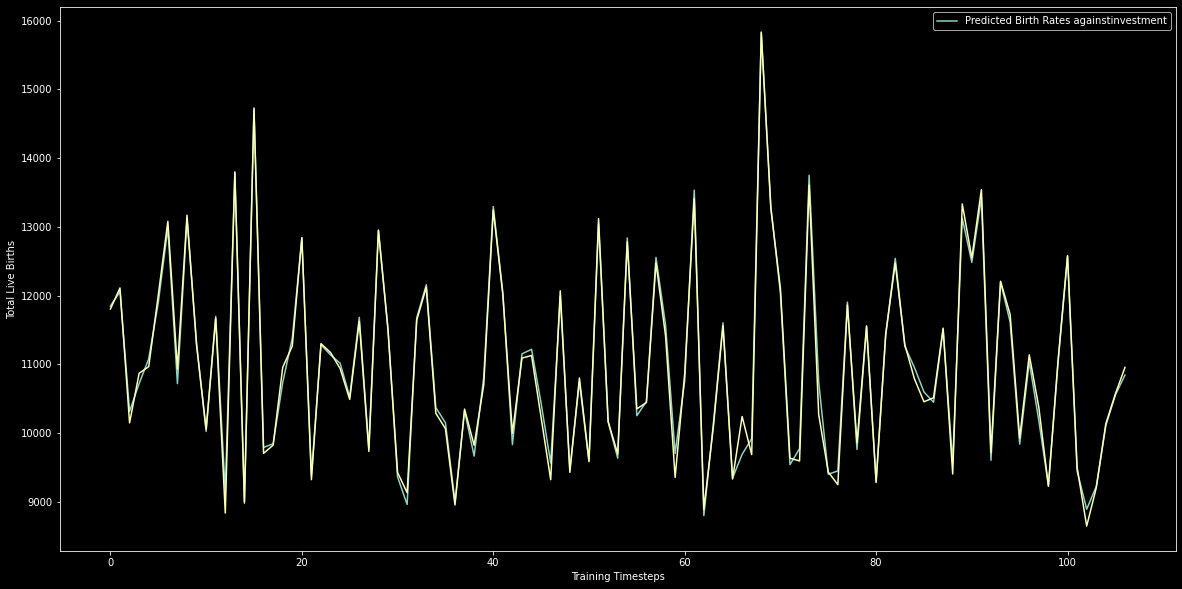

Iter:  120 train_loss:  0.004391242677229457 val_loss:  0.7193909846246243
Iter:  121 train_loss:  0.004203715849143919 val_loss:  0.718200083822012
Iter:  122 train_loss:  0.004061602703586686 val_loss:  0.7139473147690296
Iter:  123 train_loss:  0.004876188784692204 val_loss:  0.7273349314928055
Mean Square Error: 0.12269346 | Mean Absolute Error: 0.27631286


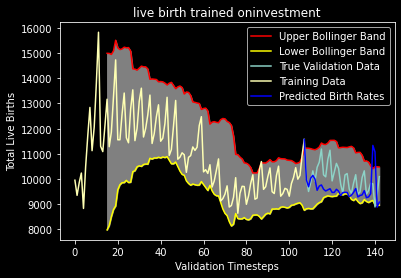

<Figure size 12000x12000 with 0 Axes>

In [9]:
endtoend(target, cols, raw_investment, "investment")

In [15]:
taxes = pd.read_csv("./taxes_industry.csv", header='infer', skiprows=10, skipfooter=16,engine='python', thousands=",").T
raw_taxes = birthmergify(quarterify(taxes),ts)
## feature selection
def select_feature(raw_df, length):
    target = list(raw_df)[1]
    cols = list(raw_df)[9:length]
    timelist = list(raw_df['time'])
    print('Training set shape:{}'.format(raw_df.shape))
    print('Length of Time Series: {}'.format(len(timelist)))
    print('Feature targetted: {}'.format(target))
    print('Featured selected: {}'.format(cols))
    return target, cols

target, cols = select_feature(raw_taxes,20)
raw_taxes

Training set shape:(143, 20)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['Total', '  Manufacturing', '  Construction', '  Utilities', '  Other Goods Industries', '  Wholesale & Retail Trade', '  Transportation & Storage', '  Accommodation & Food Services', '  Information & Communications', '  Finance & Insurance', '  Real Estate, Professional Services And Administrative & Support Services']


/tmp/ipykernel_22599/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


quarter Total Live-Births   1st Live-Birth   2nd Live-Birth  \
0    1986-Q1            9954.0           4414.0           3553.0   
1    1986-Q2            9353.0           4186.0           3367.0   
2    1986-Q3            9854.0           4398.0           3475.0   
3    1986-Q4           10239.0           4782.0           3423.0   
4    1987-Q1            8834.0           4007.0           3053.0   
..       ...               ...              ...              ...   
138  2020-Q3            9836.0           4762.0           3330.0   
139  2020-Q4            9808.0           4722.0           3451.0   
140  2021-Q1            8894.0           4097.0           3220.0   
141  2021-Q2            9411.0           4298.0           3459.0   
142  2021-Q3           10097.0           4666.0           3673.0   

      3rd Live-Birth   4th Live-Birth   5th Live-Birth  \
0             1433.0            316.0            103.0   
1             1271.0            332.0             87.0   
2             1395.0            359.0             98.0   
3             1454.0            351.0             98.0   
4             1234.0            320.0             81.0   
..               ...              ...              ...   
138           1174.0            381.0            116.0   
139           1133.0            323.0            117.0   
140           1093.0            326.0             98.0   
141           1140.0            339.0            112.0   
142           1210.0            361.0             98.0   

      6th Live-Birth & Over       time   Total   Manufacturing   Construction  \
0                      61.0 1986-01-01   392.2            38.5           50.9   
1                      50.0 1986-04-01   256.0            26.9           32.4   
2                      44.0 1986-07-01   314.6            33.7           31.1   
3                      51.0 1986-10-01   283.7            33.6           28.8   
4                      56.0 1987-01-01   332.3            29.6           27.1   
..                      ...        ...     ...             ...            ...   
138                    73.0 2020-07-01 -5789.6          -797.6         -974.3   
139                    62.0 2020-10-01 -5034.1          -661.9         -480.3   
140                    60.0 2021-01-01  -631.8           -88.8           -8.5   
141                    63.0 2021-04-01 -1243.7          -146.2           62.0   
142                    89.0 2021-07-01 -1096.3           -65.9           16.6   

      Utilities   Other Goods Industries   Wholesale & Retail Trade  \
0          10.3                      6.5                       29.1   
1           9.4                      2.5                       18.2   
2          11.1                      3.0                       25.6   
3          10.9                      2.8                       25.3   
4          12.3                      4.9                       19.5   
..          ...                      ...                        ...   
138        17.7                     -2.0                     -931.9   
139        -1.0                     -1.3                     -808.1   
140        76.7                      0.4                     -328.7   
141        31.1                      0.3                     -324.8   
142        32.0                      0.4                     -363.7   

      Transportation & Storage   Accommodation & Food Services  \
0                         88.7                             9.3   
1                         29.7                             7.4   
2                         46.6                             9.0   
3                         36.8                             9.0   
4                         67.7                             6.0   
..                         ...                             ...   
138                     -472.4                          -436.3   
139                     -405.8                          -364.2   
140                     -143.2                          -253.4   
141  

mse:  3022087.2 mae:  1385.8401


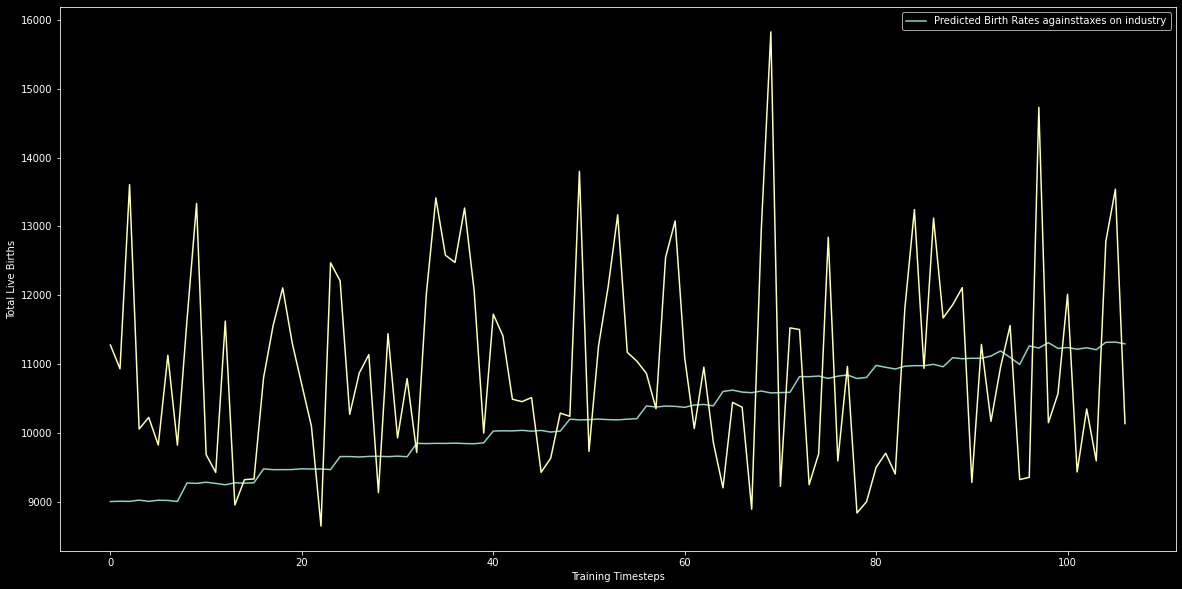

Iter:  0 train_loss:  0.8174402844160795 val_loss:  0.2598541807383299
Iter:  1 train_loss:  0.5737877301871777 val_loss:  0.38631979562342167
Iter:  2 train_loss:  0.5241130962967873 val_loss:  0.3328882586210966
Iter:  3 train_loss:  0.4725825656205416 val_loss:  0.40402941405773163
Iter:  4 train_loss:  0.40232608281075954 val_loss:  0.4016985706984997
Iter:  5 train_loss:  0.3075638357549906 val_loss:  0.6561290137469769
Iter:  6 train_loss:  0.2681055483408272 val_loss:  0.589222576469183
Iter:  7 train_loss:  0.2767374296672642 val_loss:  0.6466731764376163
Iter:  8 train_loss:  0.2602016928140074 val_loss:  0.5960017815232277
Iter:  9 train_loss:  0.21959320455789566 val_loss:  0.5703151039779186
Iter:  10 train_loss:  0.2038624898996204 val_loss:  0.624351292848587
Iter:  11 train_loss:  0.1631475673057139 val_loss:  0.6633769422769547
Iter:  12 train_loss:  0.16823129216209054 val_loss:  0.5185673423111439
Iter:  13 train_loss:  0.15261999855283648 val_loss:  0.550858493894338

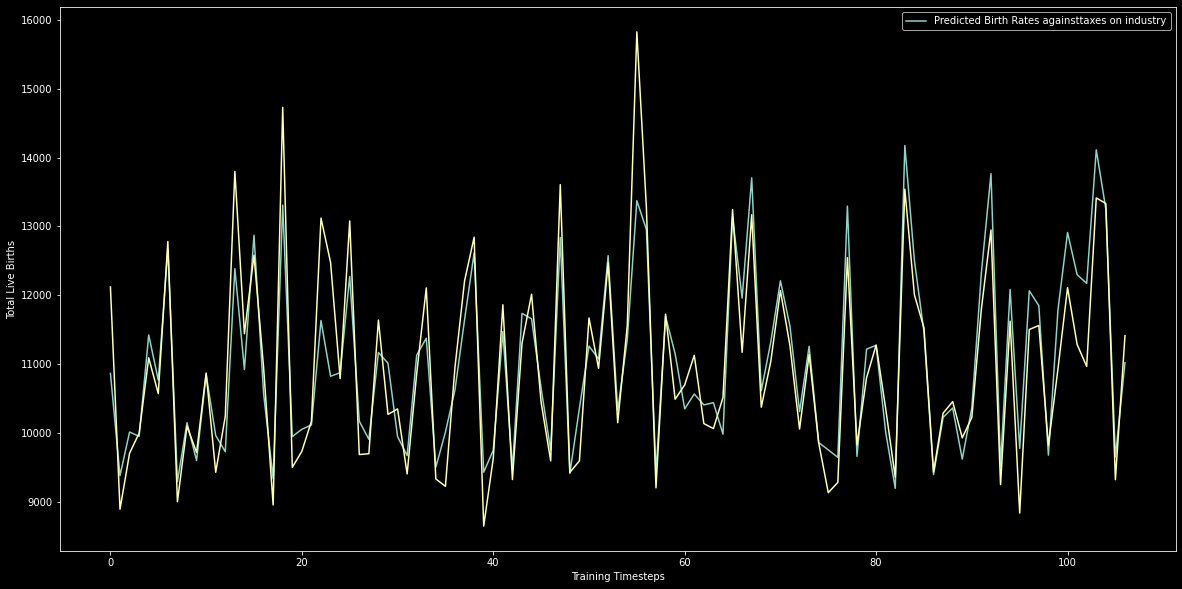

Iter:  20 train_loss:  0.09095470723696053 val_loss:  0.6890967302024364
Iter:  21 train_loss:  0.09566442901268601 val_loss:  0.591263011097908
Iter:  22 train_loss:  0.10929026245139539 val_loss:  0.6045244112610817
Iter:  23 train_loss:  0.10205551725812256 val_loss:  0.631389893591404
Iter:  24 train_loss:  0.08875796326901764 val_loss:  0.5768312327563763
Iter:  25 train_loss:  0.06326999107841402 val_loss:  0.6370391510426998
Iter:  26 train_loss:  0.08455731708090752 val_loss:  0.6803043447434902
Iter:  27 train_loss:  0.07772551069501787 val_loss:  0.6967598870396614
Iter:  28 train_loss:  0.06263214652426541 val_loss:  0.6676663532853127
Iter:  29 train_loss:  0.05505236372118816 val_loss:  0.6866307333111763
Iter:  30 train_loss:  0.047712470521219075 val_loss:  0.6721269376575947
Iter:  31 train_loss:  0.04920889681670815 val_loss:  0.7345005720853806
Iter:  32 train_loss:  0.05353035742882639 val_loss:  0.8056946769356728
Iter:  33 train_loss:  0.04247915802989155 val_loss:

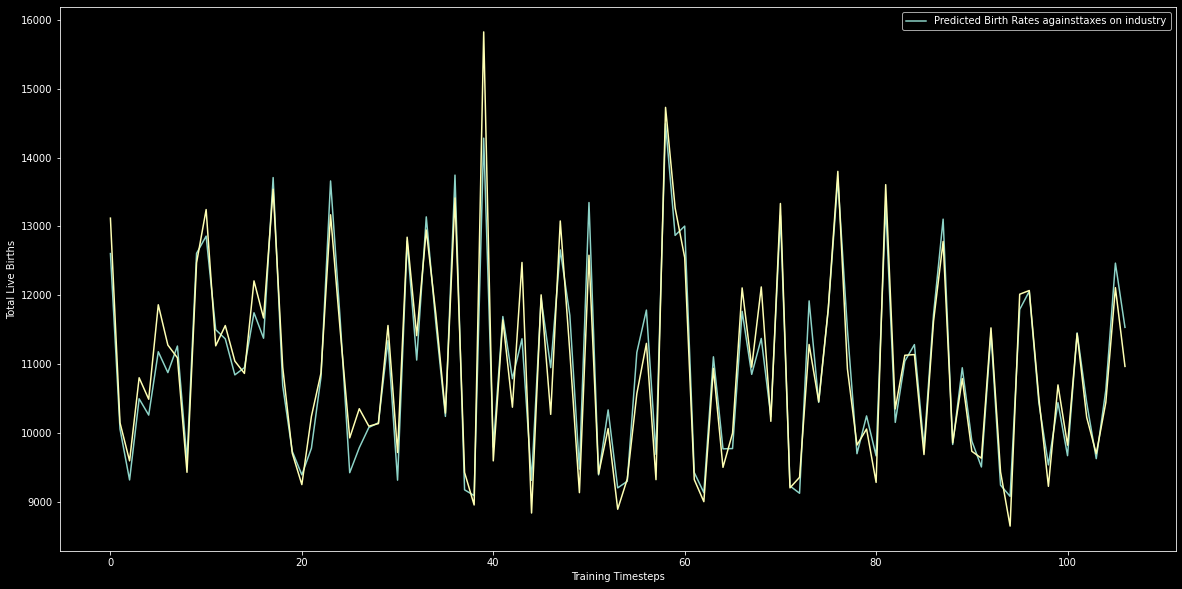

Iter:  40 train_loss:  0.03541977202985436 val_loss:  0.7655534818768501
Iter:  41 train_loss:  0.034794900158885866 val_loss:  0.6889210566878319
Iter:  42 train_loss:  0.037489518348593265 val_loss:  0.6837603487074375
Iter:  43 train_loss:  0.05704644526122138 val_loss:  0.6959753707051277
Iter:  44 train_loss:  0.05622425151523203 val_loss:  0.6506450586020947
Iter:  45 train_loss:  0.0434783992022858 val_loss:  0.6596030294895172
Iter:  46 train_loss:  0.04689697333378717 val_loss:  0.6785234250128269
Iter:  47 train_loss:  0.03306482941843569 val_loss:  0.6613090299069881
Iter:  48 train_loss:  0.03689356072572991 val_loss:  0.6994941830635071
Iter:  49 train_loss:  0.03024613409070298 val_loss:  0.62957813590765
Iter:  50 train_loss:  0.03127621847670525 val_loss:  0.6424689888954163
Iter:  51 train_loss:  0.029794727335684 val_loss:  0.6193046197295189
Iter:  52 train_loss:  0.027937273727729917 val_loss:  0.6203696690499783
Iter:  53 train_loss:  0.030340838886331767 val_loss:

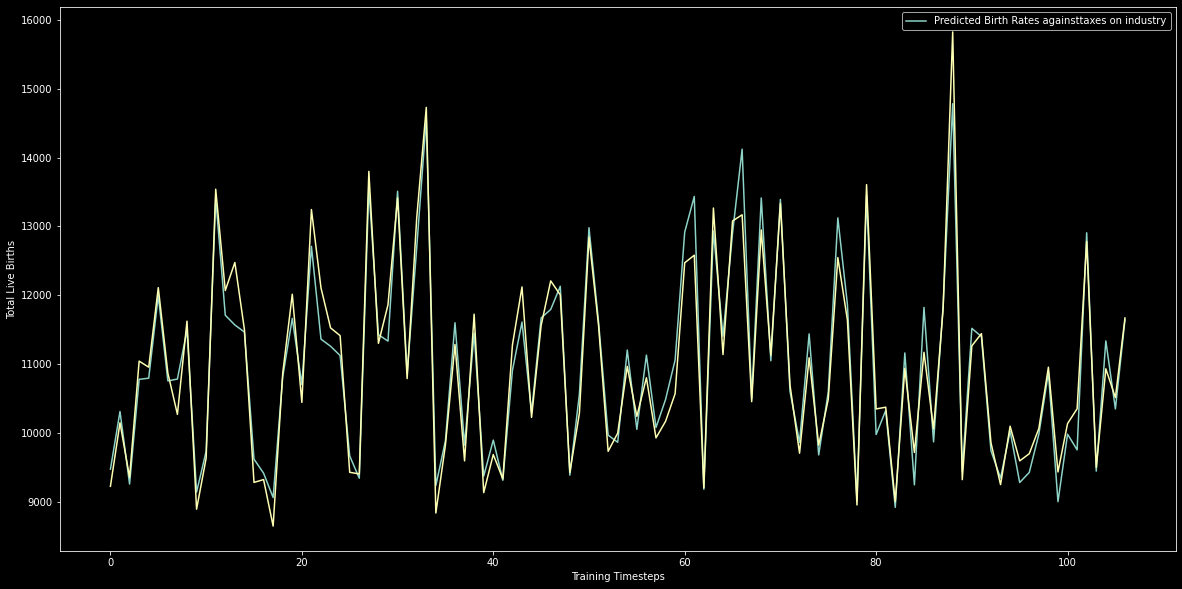

Iter:  60 train_loss:  0.028440485417377204 val_loss:  0.6436823047697544
Iter:  61 train_loss:  0.0253804090898484 val_loss:  0.6654949188232422
Iter:  62 train_loss:  0.02470196009380743 val_loss:  0.5793421715497971
Iter:  63 train_loss:  0.024641689462441718 val_loss:  0.6051014065742493
Iter:  64 train_loss:  0.023626621812582016 val_loss:  0.5623963326215744
Iter:  65 train_loss:  0.026239794911816716 val_loss:  0.5934845358133316
Iter:  66 train_loss:  0.024178214312996715 val_loss:  0.58745476603508
Iter:  67 train_loss:  0.020599176117684692 val_loss:  0.5673445798456669
Iter:  68 train_loss:  0.022232558898394927 val_loss:  0.6104256249964237
Iter:  69 train_loss:  0.020215491429553367 val_loss:  0.6399112418293953
Iter:  70 train_loss:  0.0170445616095094 val_loss:  0.5922842249274254
Iter:  71 train_loss:  0.017388692940585315 val_loss:  0.6773952282965183
Iter:  72 train_loss:  0.017756681321770884 val_loss:  0.6349938772618771
Iter:  73 train_loss:  0.018476343248039484 v

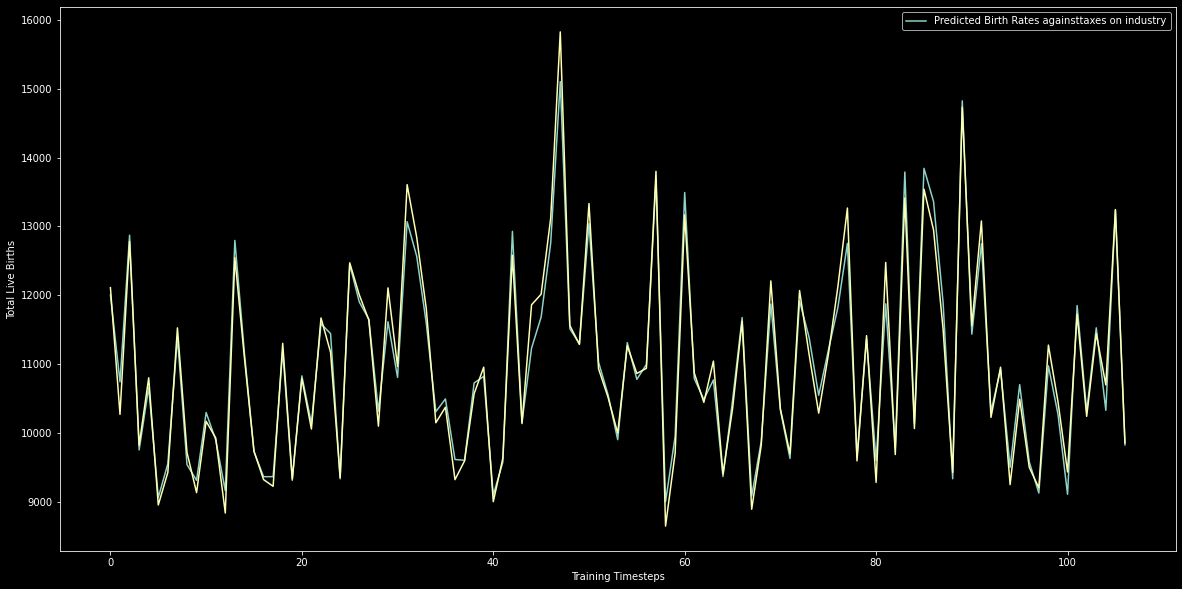

Iter:  80 train_loss:  0.014563837379682809 val_loss:  0.641635924577713
Iter:  81 train_loss:  0.012661656859563664 val_loss:  0.6413404308259487
Iter:  82 train_loss:  0.012782262521795928 val_loss:  0.6726030856370926
Iter:  83 train_loss:  0.014302966897957958 val_loss:  0.6522038020193577
Iter:  84 train_loss:  0.012406739697325975 val_loss:  0.6314239613711834
Iter:  85 train_loss:  0.013588071597041562 val_loss:  0.6589950248599052
Iter:  86 train_loss:  0.021032771095633507 val_loss:  0.6459975466132164
Iter:  87 train_loss:  0.016811401612358168 val_loss:  0.5406873971223831
Iter:  88 train_loss:  0.012322356400545686 val_loss:  0.6466462537646294
Iter:  89 train_loss:  0.015427660793648101 val_loss:  0.634832676500082
Iter:  90 train_loss:  0.01393515216477681 val_loss:  0.6201488636434078
Iter:  91 train_loss:  0.016453657648526132 val_loss:  0.6585257090628147
Iter:  92 train_loss:  0.014406270696781576 val_loss:  0.6089507266879082
Iter:  93 train_loss:  0.0151988833385985

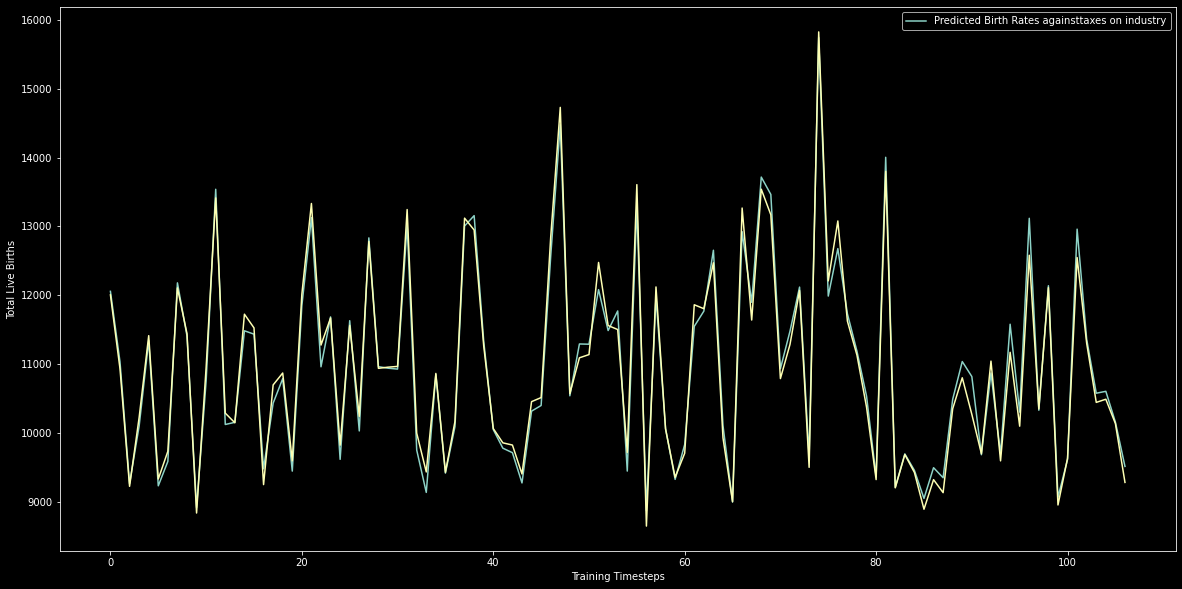

Iter:  100 train_loss:  0.009528159018373117 val_loss:  0.5956651791930199
Iter:  101 train_loss:  0.010959938634186983 val_loss:  0.5976342298090458
Iter:  102 train_loss:  0.01017724594566971 val_loss:  0.5851367563009262
Iter:  103 train_loss:  0.010206066188402474 val_loss:  0.6155922785401344
Iter:  104 train_loss:  0.009288862493121997 val_loss:  0.591943122446537
Iter:  105 train_loss:  0.008496642869431525 val_loss:  0.6115136183798313
Iter:  106 train_loss:  0.007375960682111327 val_loss:  0.5851577073335648
Iter:  107 train_loss:  0.007336911323363893 val_loss:  0.5982805378735065
Iter:  108 train_loss:  0.00802203432249371 val_loss:  0.6035564430058002
Iter:  109 train_loss:  0.007802713385899551 val_loss:  0.5923110507428646
Iter:  110 train_loss:  0.007968638063175604 val_loss:  0.6026741117238998
Iter:  111 train_loss:  0.007545081112766638 val_loss:  0.6039049699902534
Iter:  112 train_loss:  0.008192450426577125 val_loss:  0.5893504358828068
Iter:  113 train_loss:  0.01

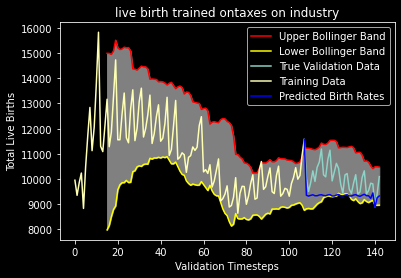

<Figure size 12000x12000 with 0 Axes>

In [16]:
endtoend(target, cols, raw_taxes, "taxes on industry")

In [12]:
bop = pd.read_csv("balance_of_payment.csv", header='infer', skiprows=10, skipfooter=38,engine='python', thousands=",").T
raw_bop = birthmergify(quarterify(bop),ts)
target, cols = select_feature(raw_bop, 45)


Training set shape:(143, 48)
Length of Time Series: 143
Feature targetted: Total Live-Births
Featured selected: ['D  Overall Balance (A-B+C)', '  A  Current Account Balance', '    Goods Balance', '      Exports Of Goods', '      Imports Of Goods', '    Services Balance', '      Exports Of Services', '         Exports Of Transport', '         Exports Of Travel', '         Exports Of Insurance', '         Exports Of Government Goods And Services', '         Exports Of Other Business Services', '      Imports Of Services', '        Imports Of Transport', '        Imports Of Travel', '        Imports Of Insurance', '        Imports Of Government Goods And Services', '        Imports Of Other Business Services', '    Primary Income Balance', '      Primary Income Receipts', '      Primary Income Payments', '    Secondary Income Balance', '  B  Capital & Financial Account Balance', '    Financial Account (Net)', '      Direct Investment', '      Portfolio Investment', '      Other Investment

/tmp/ipykernel_22599/1199900175.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  rawdf['quarter'] =rawdf['quarter'].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


mse:  2599209.0 mae:  1293.9559


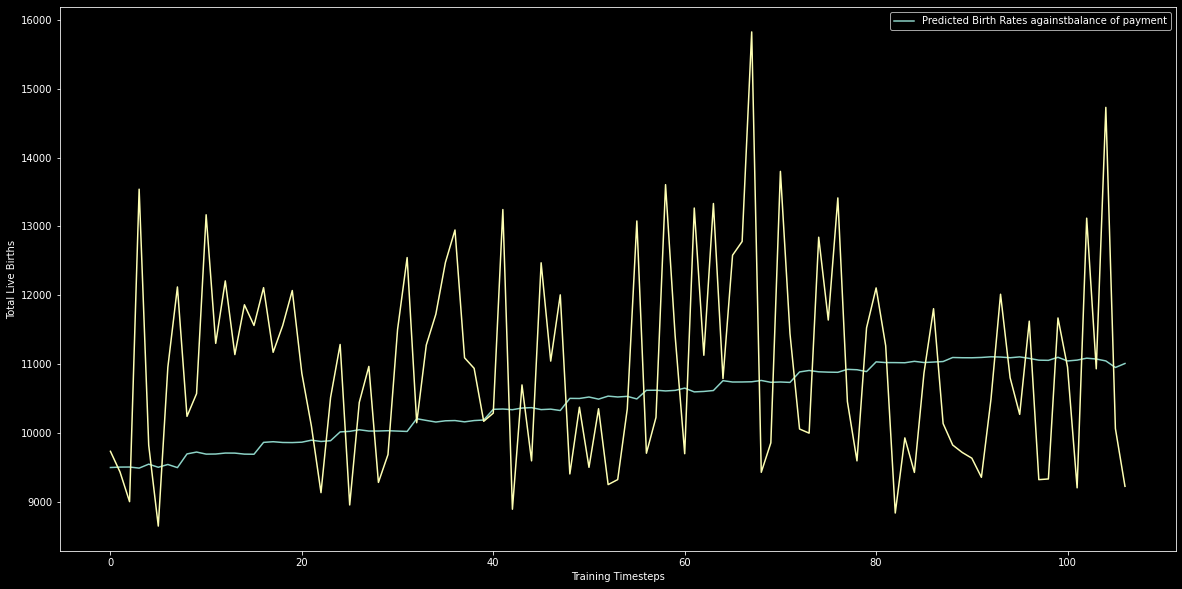

Iter:  0 train_loss:  0.74467508867383 val_loss:  0.36193019710481167
Iter:  1 train_loss:  0.49767101369798183 val_loss:  0.3686891123652458
Iter:  2 train_loss:  0.3959009158425033 val_loss:  0.457399345934391
Iter:  3 train_loss:  0.31915595568716526 val_loss:  0.6439983174204826
Iter:  4 train_loss:  0.2666653427295387 val_loss:  0.6210542544722557
Iter:  5 train_loss:  0.2761924145743251 val_loss:  0.611807681620121
Iter:  6 train_loss:  0.26402472401969135 val_loss:  0.6712254956364632
Iter:  7 train_loss:  0.275637514423579 val_loss:  0.5733753927052021
Iter:  8 train_loss:  0.2591513112129178 val_loss:  0.6807260513305664
Iter:  9 train_loss:  0.2716238205321133 val_loss:  0.8061823844909668
Iter:  10 train_loss:  0.2681244653649628 val_loss:  0.5643672868609428
Iter:  11 train_loss:  0.2482358319684863 val_loss:  0.7189119160175323
Iter:  12 train_loss:  0.2541795722208917 val_loss:  0.6747255846858025
Iter:  13 train_loss:  0.23393105389550328 val_loss:  0.735482819378376
Ite

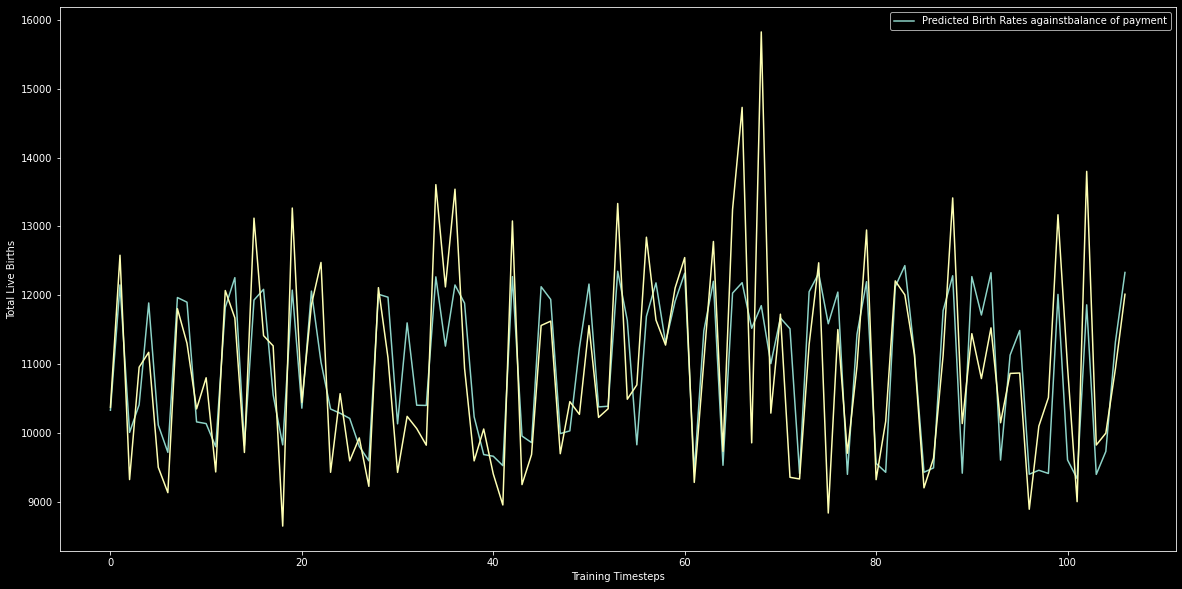

Iter:  20 train_loss:  0.212977065006271 val_loss:  0.7805217429995537
Iter:  21 train_loss:  0.20566265401430428 val_loss:  0.7298719435930252
Iter:  22 train_loss:  0.19781467248685658 val_loss:  0.7372704520821571
Iter:  23 train_loss:  0.2154052760452032 val_loss:  0.668015144765377
Iter:  24 train_loss:  0.21047143591567874 val_loss:  0.7021060399711132
Iter:  25 train_loss:  0.2083429608028382 val_loss:  0.677429236471653
Iter:  26 train_loss:  0.2438123282045126 val_loss:  0.5780184492468834
Iter:  27 train_loss:  0.2714441518764943 val_loss:  0.6381761059165001
Iter:  28 train_loss:  0.23992779850959778 val_loss:  0.7387750335037708
Iter:  29 train_loss:  0.21585561241954565 val_loss:  0.6599876433610916
Iter:  30 train_loss:  0.18250621808692813 val_loss:  0.7428527325391769
Iter:  31 train_loss:  0.18697400530800223 val_loss:  0.6753523908555508
Iter:  32 train_loss:  0.15191564336419106 val_loss:  0.6470754444599152
Iter:  33 train_loss:  0.13888435531407595 val_loss:  0.757

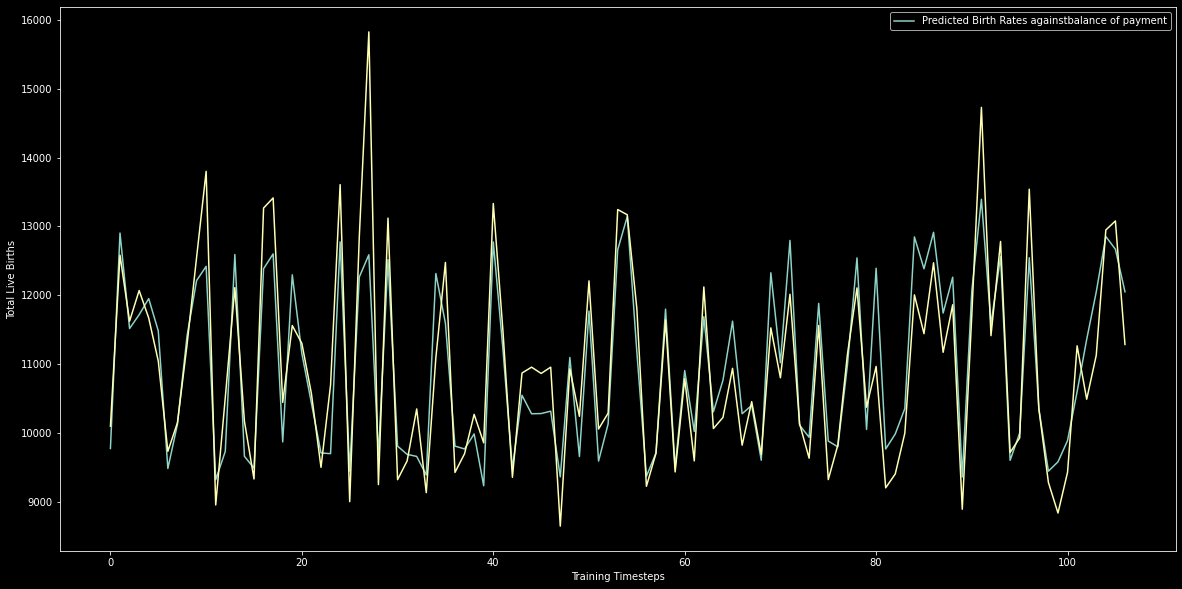

Iter:  40 train_loss:  0.10629849473480135 val_loss:  0.7165139019489288
Iter:  41 train_loss:  0.0900360126979649 val_loss:  0.6667916402220726
Iter:  42 train_loss:  0.08486756717320532 val_loss:  0.6587873734533787
Iter:  43 train_loss:  0.07637618388980627 val_loss:  0.6501179151237011
Iter:  44 train_loss:  0.08657975937239826 val_loss:  0.6224635243415833
Iter:  45 train_loss:  0.07642147201113403 val_loss:  0.6777387708425522
Iter:  46 train_loss:  0.06854147976264358 val_loss:  0.6019221022725105
Iter:  47 train_loss:  0.06505277939140797 val_loss:  0.6405392475426197
Iter:  48 train_loss:  0.05827712593600154 val_loss:  0.7453868873417377
Iter:  49 train_loss:  0.07891887897858396 val_loss:  0.6874597370624542
Iter:  50 train_loss:  0.08252472546882927 val_loss:  0.7593933790922165
Iter:  51 train_loss:  0.07531776675023139 val_loss:  0.6841178312897682
Iter:  52 train_loss:  0.06592535402160138 val_loss:  0.6962710097432137
Iter:  53 train_loss:  0.051645813044160604 val_loss

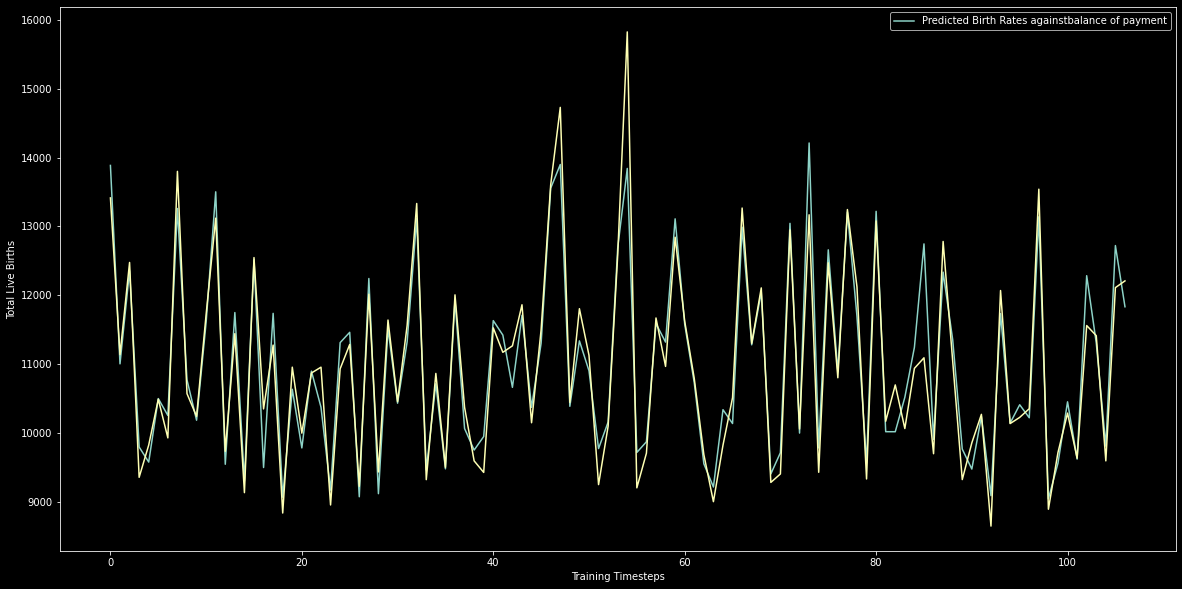

Iter:  60 train_loss:  0.04597189440391958 val_loss:  0.7196348235011101
Iter:  61 train_loss:  0.05035662476439029 val_loss:  0.6469741761684418
Iter:  62 train_loss:  0.04678172362037003 val_loss:  0.6563436165452003
Iter:  63 train_loss:  0.044776858354453 val_loss:  0.6669981479644775
Iter:  64 train_loss:  0.05137680150801316 val_loss:  0.6810926832258701
Iter:  65 train_loss:  0.03759213740704581 val_loss:  0.6944315209984779
Iter:  66 train_loss:  0.03845614613965154 val_loss:  0.6314986944198608
Iter:  67 train_loss:  0.035572337816120125 val_loss:  0.6859153397381306
Iter:  68 train_loss:  0.03786500234855339 val_loss:  0.651853833347559
Iter:  69 train_loss:  0.04151208890834823 val_loss:  0.6424586735665798
Iter:  70 train_loss:  0.03927325981203467 val_loss:  0.608160950243473
Iter:  71 train_loss:  0.036976851522922516 val_loss:  0.7740930691361427
Iter:  72 train_loss:  0.04399108374491334 val_loss:  0.6117578484117985
Iter:  73 train_loss:  0.06536247173789889 val_loss: 

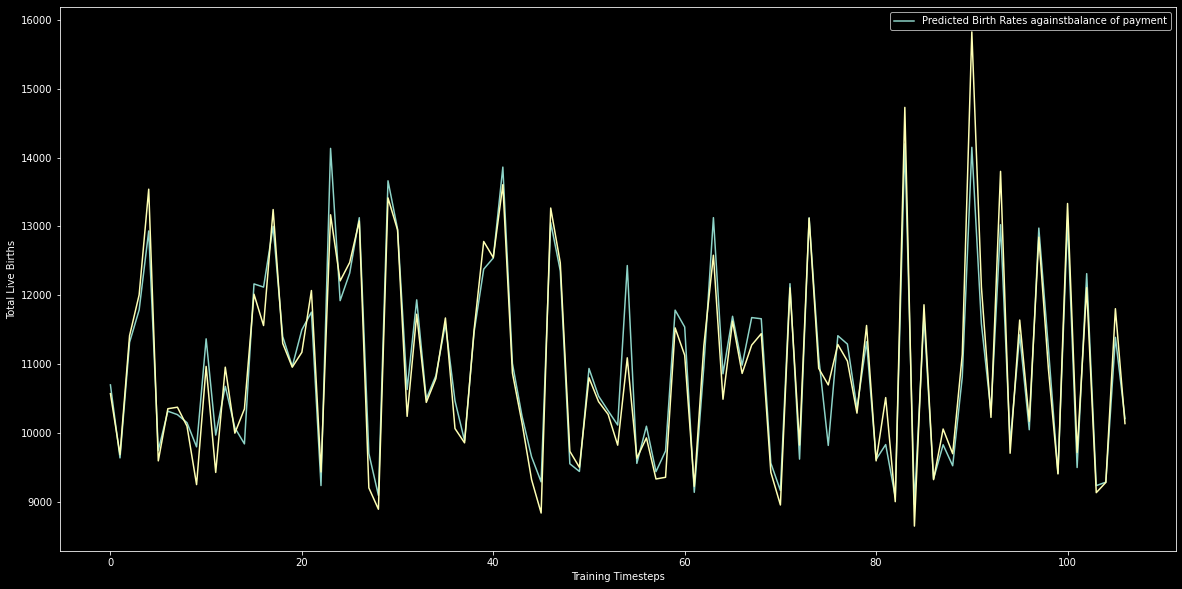

Iter:  80 train_loss:  0.03491040016524494 val_loss:  0.697928175330162
Iter:  81 train_loss:  0.03325743356253952 val_loss:  0.6596836373209953
Iter:  82 train_loss:  0.03237992455251515 val_loss:  0.694871686398983
Iter:  83 train_loss:  0.032538574741920456 val_loss:  0.6657188385725021
Iter:  84 train_loss:  0.0306796784279868 val_loss:  0.6375642344355583
Iter:  85 train_loss:  0.029729927890002728 val_loss:  0.7055833339691162
Iter:  86 train_loss:  0.028763730253558606 val_loss:  0.7086819112300873
Iter:  87 train_loss:  0.03703151230001822 val_loss:  0.7049565389752388
Iter:  88 train_loss:  0.044910690165124834 val_loss:  0.6379025056958199
Iter:  89 train_loss:  0.03218107996508479 val_loss:  0.6514150127768517
Iter:  90 train_loss:  0.026065036770887673 val_loss:  0.6921054609119892
Iter:  91 train_loss:  0.03195673110894859 val_loss:  0.6951957494020462
Iter:  92 train_loss:  0.03376536353607662 val_loss:  0.7131263762712479
Iter:  93 train_loss:  0.02780755888670683 val_lo

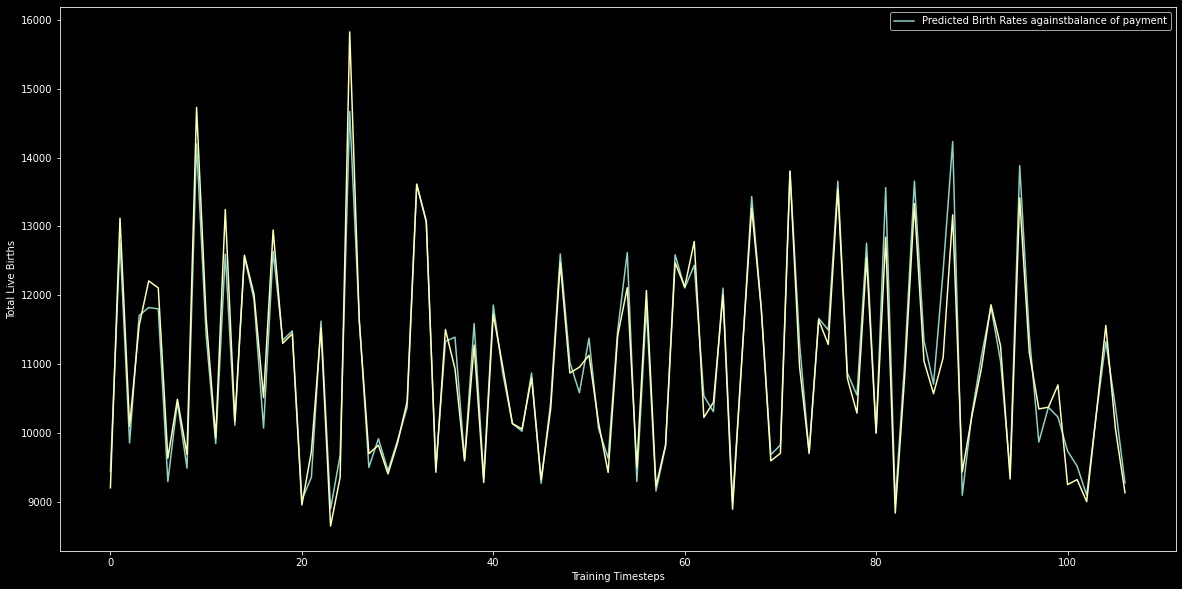

Iter:  100 train_loss:  0.024994002873427235 val_loss:  0.6806154698133469
Iter:  101 train_loss:  0.023277603133465163 val_loss:  0.675261165946722
Iter:  102 train_loss:  0.020122619869653136 val_loss:  0.6557554379105568
Iter:  103 train_loss:  0.018352606377447955 val_loss:  0.6665666103363037
Iter:  104 train_loss:  0.021154237387236208 val_loss:  0.6615512706339359
Iter:  105 train_loss:  0.019506208613165654 val_loss:  0.6821411773562431
Iter:  106 train_loss:  0.019012968143215403 val_loss:  0.687197357416153
Iter:  107 train_loss:  0.023861449415562674 val_loss:  0.704209066927433
Iter:  108 train_loss:  0.022633690619841218 val_loss:  0.6963554546236992
Iter:  109 train_loss:  0.024377475085202605 val_loss:  0.668078102171421
Iter:  110 train_loss:  0.022243938932660967 val_loss:  0.6357418149709702
Iter:  111 train_loss:  0.022310209285933524 val_loss:  0.6886084526777267
Iter:  112 train_loss:  0.01899267587577924 val_loss:  0.6782670989632607
Iter:  113 train_loss:  0.0167

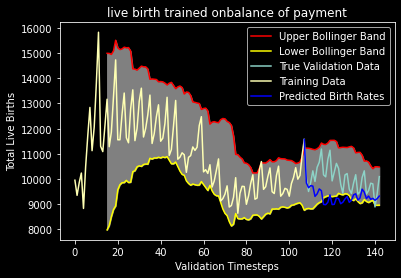

<Figure size 12000x12000 with 0 Axes>

In [13]:
endtoend(target, cols, raw_bop, "balance of payment")